In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Загрузка данных

In [2]:
df = pd.read_csv('/content/Cameras - Лист1 (2).csv')
df

,Название,Ссылка,Производитель,Вес (в kg),"Размер экрана (без "")",Наличие пыле/влаго защиты,Мегапиксели (основная камера),Максимальный ISO,Максимальный расширенный диапазон ISO,Непрерывная сьемка FPS,Видео (качество),Видеозапись fps,Время работы батареи (shots),Емкость аккумулятора,Цена
0,Leica Q2,https://versus.com/ru/leica-q2,Leica,"0,734",3,1,47,50000,50000,10,1080,120,370,1860,468407
1,Sony a7S III,https://versus.com/ru/sony-a7s-iii,Sony,"0,699",3,1,"13,00",102400,409600,10,2160,120,600,2280,343000
2,Sony FX3,https://versus.com/ru/sony-fx3,Sony,"0,64","2,95",1,"10,20",102400,409600,10,2160,120,600,2280,295000
3,Sony A6700,Ссылка,Sony,"0,493",3,1,"26,00",32000,102400,11,2160,120,570,2280,106780
4,Sony FX30,Ссылка,Sony,"0,646",3,1,"26,10",32000,102400,10,2160,120,600,2280,153000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Canon EOS RP,https://versus.com/ru/canon-eos-rp,Canon,"0,485",3,1,"26,2",40000,102400,5,2160,24,250,1040,80371
99,Canon EOS R100,https://versus.com/ru/canon-eos-r100,Canon,"0,356",3,0,"24,1",12800,35600,"6,5",2160,24,340,1040,49990
100,Canon EOS 250D,https://versus.com/ru/canon-eos-250d,Canon,"0,449",3,0,"24,1",25600,51200,5,2160,24,1070,1200,48490
101,Panasonic Lumix DMC-FZ300,https://versus.com/ru/panasonic-lumix-dmc-fz300,Panasonic,"0,691",3,1,12,6400,6400,12,2160,24,380,1200,99990


In [3]:
print(df.dtypes)
df["Вес (в kg)"] = pd.to_numeric(df["Вес (в kg)"].str.replace(",", ".", regex=False), errors="coerce")
df['Размер экрана (без ")'] = pd.to_numeric(df['Размер экрана (без ")'].str.replace(",", ".", regex=False), errors='coerce')
df["Мегапиксели (основная камера)"] = pd.to_numeric(df["Мегапиксели (основная камера)"].str.replace(",", ".", regex=False), errors="coerce")
df["Непрерывная сьемка FPS"] = pd.to_numeric(df["Непрерывная сьемка FPS"].str.replace(",", ".", regex=False), errors="coerce")


Название                                 object
Ссылка                                   object
Производитель                            object
Вес (в kg)                               object
Размер экрана (без ")                    object
Наличие пыле/влаго защиты                 int64
Мегапиксели (основная камера)            object
Максимальный ISO                          int64
Максимальный расширенный диапазон ISO     int64
Непрерывная сьемка FPS                   object
Видео (качество)                          int64
Видеозапись fps                           int64
Время работы батареи (shots)              int64
Емкость аккумулятора                      int64
Цена                                      int64
dtype: object


#Описательные статистики и корреляционная матрица


In [4]:
descriptive_stats = np.round(df.describe(), 2)
descriptive_stats

,Вес (в kg),"Размер экрана (без "")",Наличие пыле/влаго защиты,Мегапиксели (основная камера),Максимальный ISO,Максимальный расширенный диапазон ISO,Непрерывная сьемка FPS,Видео (качество),Видеозапись fps,Время работы батареи (shots),Емкость аккумулятора,Цена
count,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00
mean,0.64,3.05,0.60,26.72,35689.32,151067.96,11.90,2247.38,44.68,612.18,1710.62,170348.86
std,0.23,0.10,0.49,11.97,33137.80,390256.70,12.59,1016.77,23.70,565.00,583.15,168392.75
min,0.12,2.70,0.00,10.20,3200.00,3200.00,1.00,720.00,24.00,220.00,630.00,8990.00
25%,0.48,3.00,0.00,20.10,12800.00,25600.00,7.00,1620.00,30.00,365.00,1200.00,65725.00
50%,0.64,3.00,1.00,24.20,25600.00,51200.00,10.00,2160.00,30.00,440.00,1860.00,123623.00
75%,0.74,3.15,1.00,26.10,51200.00,102400.00,12.00,2160.00,60.00,635.00,2200.00,198665.00
max,1.42,3.30,1.00,61.00,204800.00,3280000.00,120.00,4320.00,120.00,4450.00,3350.00,973890.00


In [5]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
comparison_filtered = pd.DataFrame({'Показатель': numeric_cols})
comparison_filtered['Медиана'] = df[numeric_cols].median().values
comparison_filtered['Мода'] = df[numeric_cols].mode().iloc[0].values
comparison_filtered = comparison_filtered.set_index('Показатель')[['Мода', 'Медиана']]

comparison_filtered

,Мода,Медиана
Показатель,,
Вес (в kg),0.383,0.6395
"Размер экрана (без "")",3.000,3.0000
Наличие пыле/влаго защиты,1.000,1.0000
Мегапиксели (основная камера),24.200,24.2000
Максимальный ISO,12800.000,25600.0000
Максимальный расширенный диапазон ISO,51200.000,51200.0000
Непрерывная сьемка FPS,10.000,10.0000
Видео (качество),2160.000,2160.0000
Видеозапись fps,30.000,30.0000


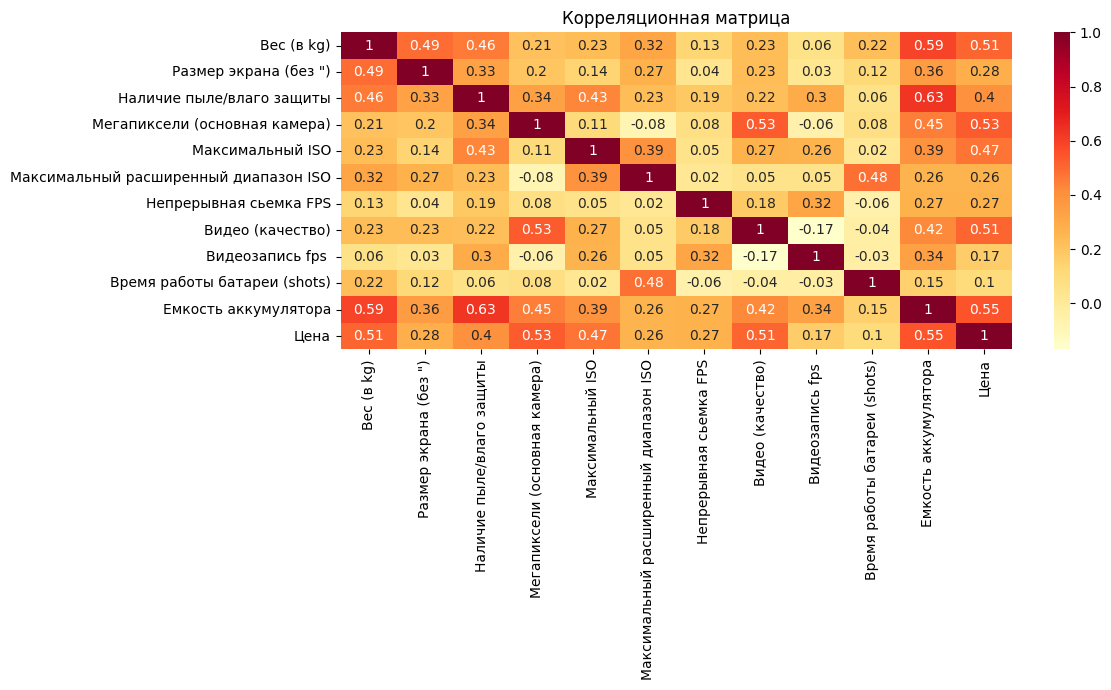

In [6]:
df_numerical = df.drop(columns=['Название', 'Ссылка'], errors='ignore')
df_numerical = df_numerical.select_dtypes(include='number')
correlation_matrix_numerical = np.round(df_numerical.corr(), 2)

plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap="YlOrRd")
plt.title("Корреляционная матрица")
plt.tight_layout()
plt.show()

#Распределение целевой переменной и регрессоров

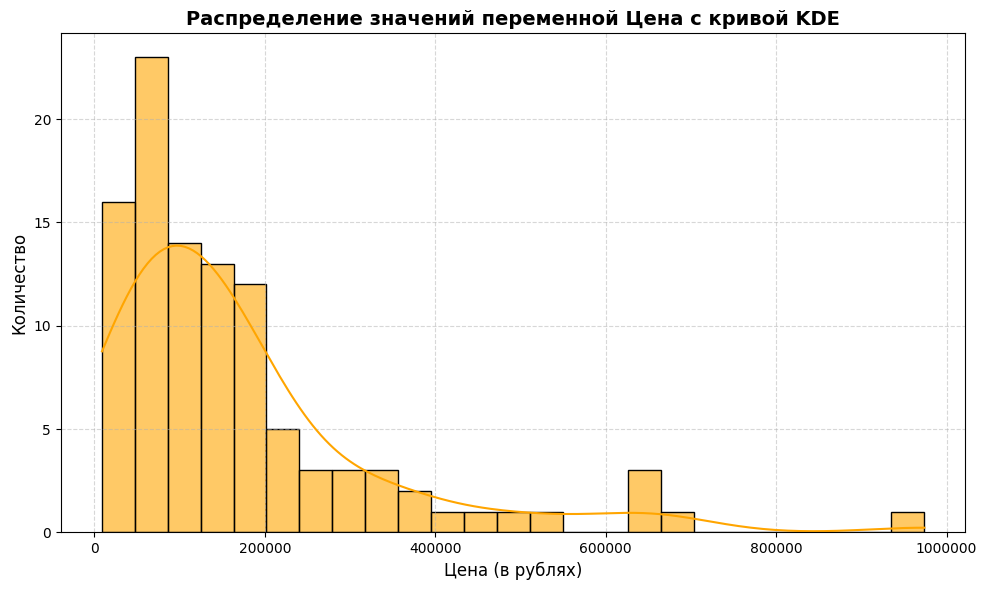

Асимметрия (Skewness): 2.20
Эксцесс (Kurtosis): 5.60


In [7]:
from scipy.stats import skew, kurtosis
target_col = 'Цена'
price_series = df[target_col].dropna()
asymmetry = skew(price_series)
peakedness = kurtosis(price_series)
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(price_series, bins=25, kde=True, stat='count',
             color='orange', edgecolor='black', alpha=0.6, ax=ax)
ax.ticklabel_format(style='plain', axis='x')
ax.set_title('Распределение значений переменной Цена с кривой KDE', fontsize=14, weight='semibold')
ax.set_xlabel('Цена (в рублях)', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Асимметрия (Skewness): {asymmetry:.2f}")
print(f"Эксцесс (Kurtosis): {peakedness:.2f}")

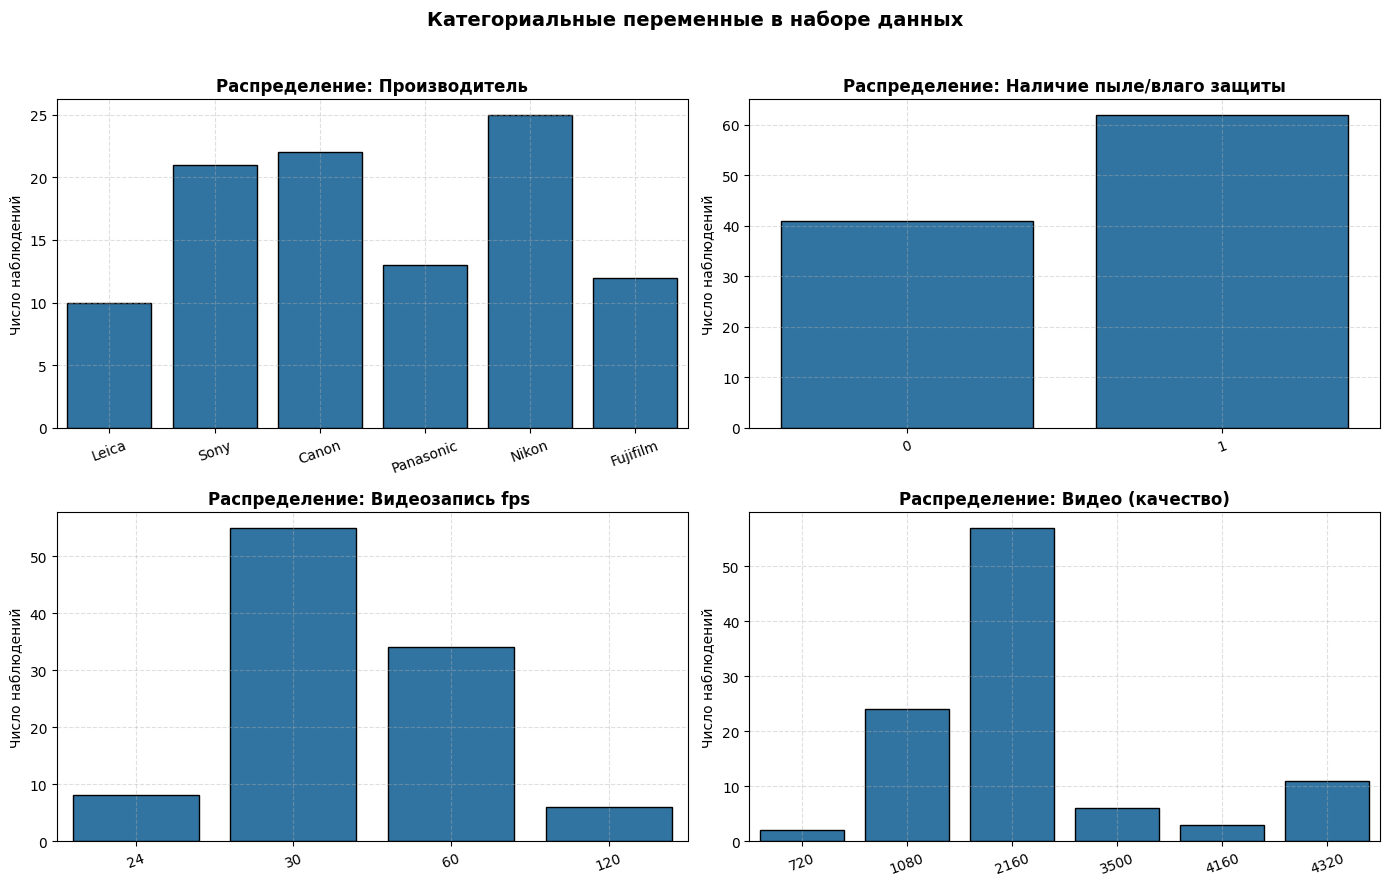

In [8]:
cat_columns = ['Производитель', 'Наличие пыле/влаго защиты', 'Видеозапись fps ', 'Видео (качество)']
fig, axs = plt.subplots(2, 2, figsize=(14, 9))
axs = axs.flatten()
for i, col in enumerate(cat_columns):
    sns.countplot(data=df, x=col, ax=axs[i], edgecolor='black')
    axs[i].set_title(f'Распределение: {col}', fontsize=12, fontweight='bold')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Число наблюдений')
    axs[i].tick_params(axis='x', rotation=20)
    axs[i].grid(True, linestyle='--', alpha=0.4)
plt.suptitle('Категориальные переменные в наборе данных', fontsize=14, weight='semibold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

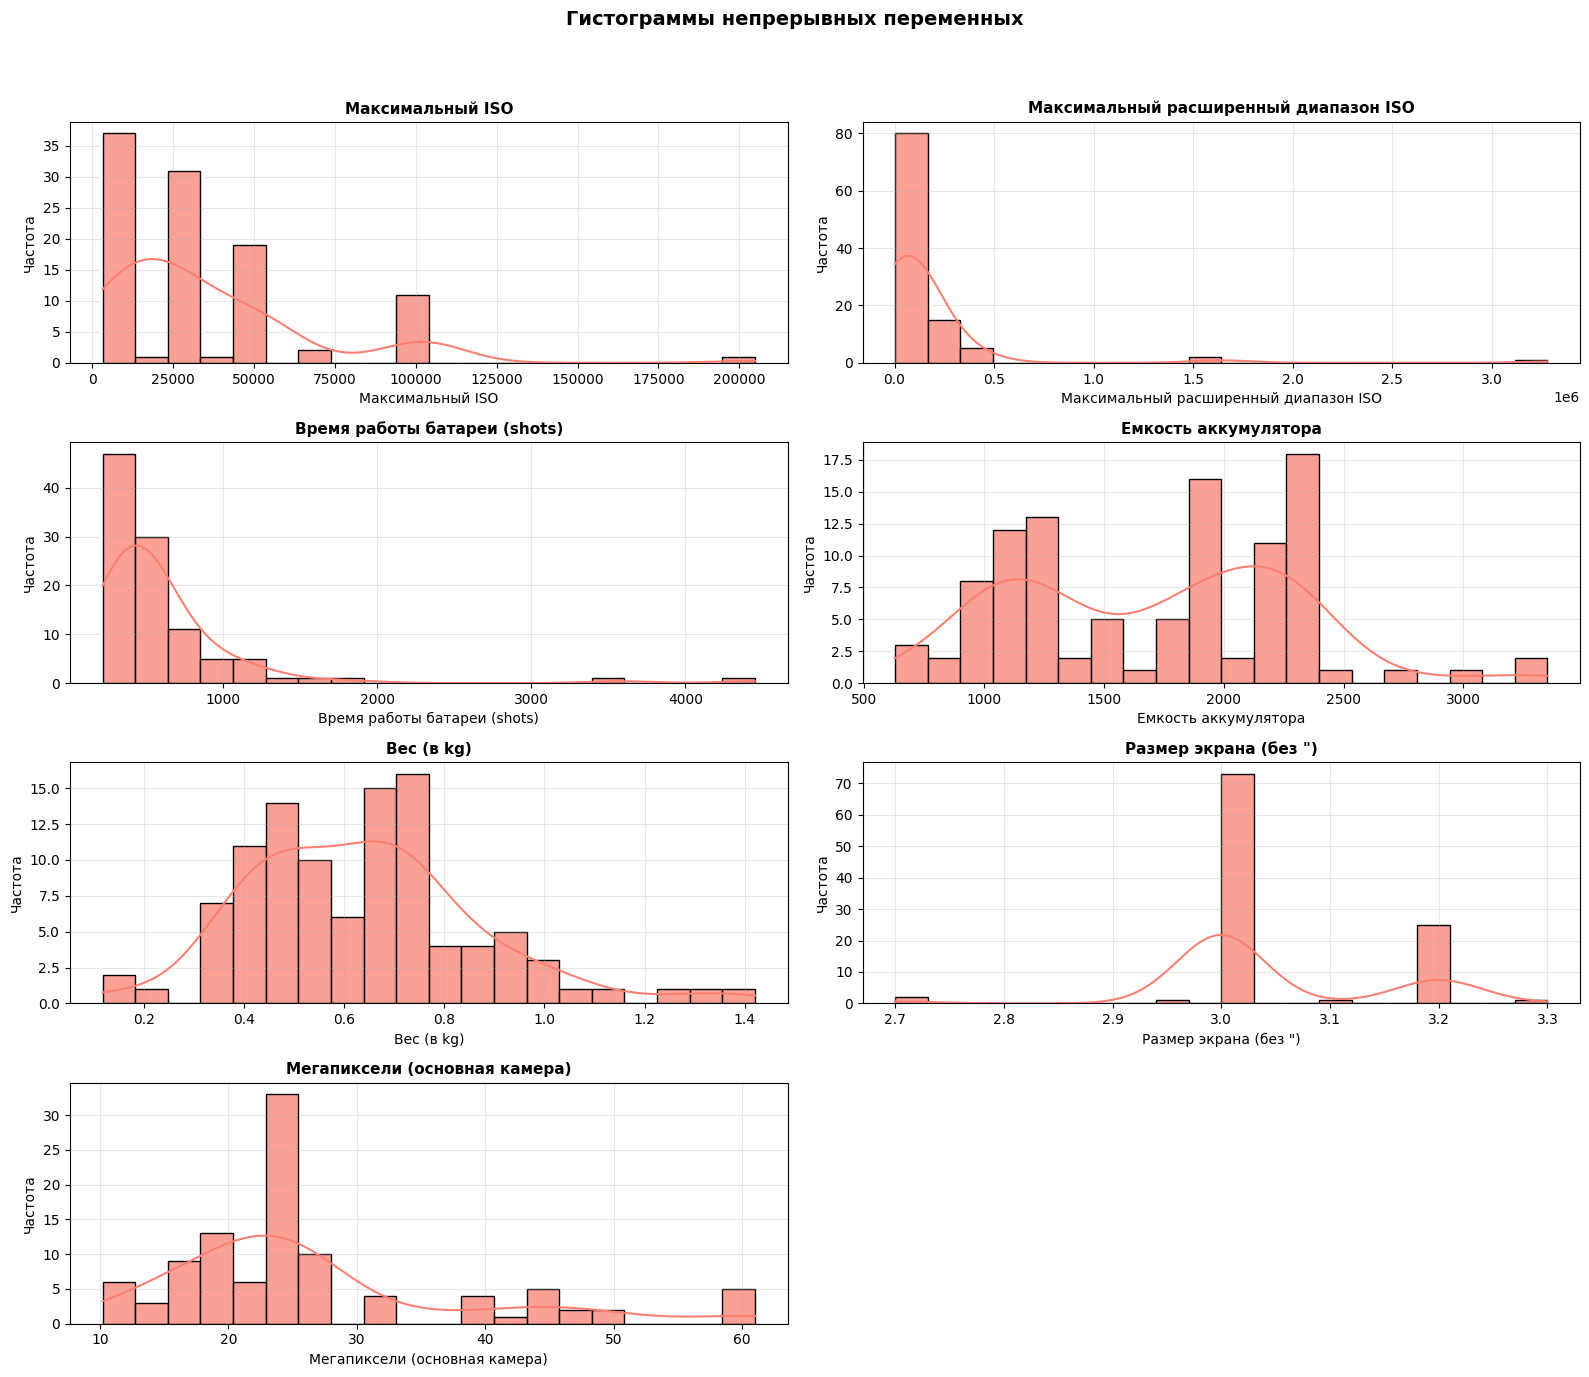

In [9]:
continuous_cols = ['Максимальный ISO', 'Максимальный расширенный диапазон ISO', 'Время работы батареи (shots)', 'Емкость аккумулятора', 'Вес (в kg)', 'Размер экрана (без ")', 'Мегапиксели (основная камера)', 'Непрерывная сьемка FPS' ]
fig, axes = plt.subplots(4, 2, figsize=(16, 14))
axes = axes.flatten()
for idx, column in enumerate(continuous_cols):
    values = df[column].dropna()
    sns.histplot(values, bins=20, kde=True, ax=axes[idx],
                 color='salmon', edgecolor='black', alpha=0.75)
    axes[idx].set_title(f'{column}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Частота')
    axes[idx].grid(True, linestyle='-', alpha=0.3)
fig.delaxes(axes[-1])
plt.suptitle('Гистограммы непрерывных переменных', fontsize=14, weight='semibold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Квантильный анализ и выбросы



Анализ для Максимальный ISO:
  Q1 (25-й процентиль): 12800.0
  Медиана (50-й процентиль): 25600.0
  Q3 (75-й процентиль): 51200.0
  Интерквартильный размах (IQR): 38400.0
  Нижняя граница для выбросов: -44800.0
  Верхняя граница для выбросов: 108800.0


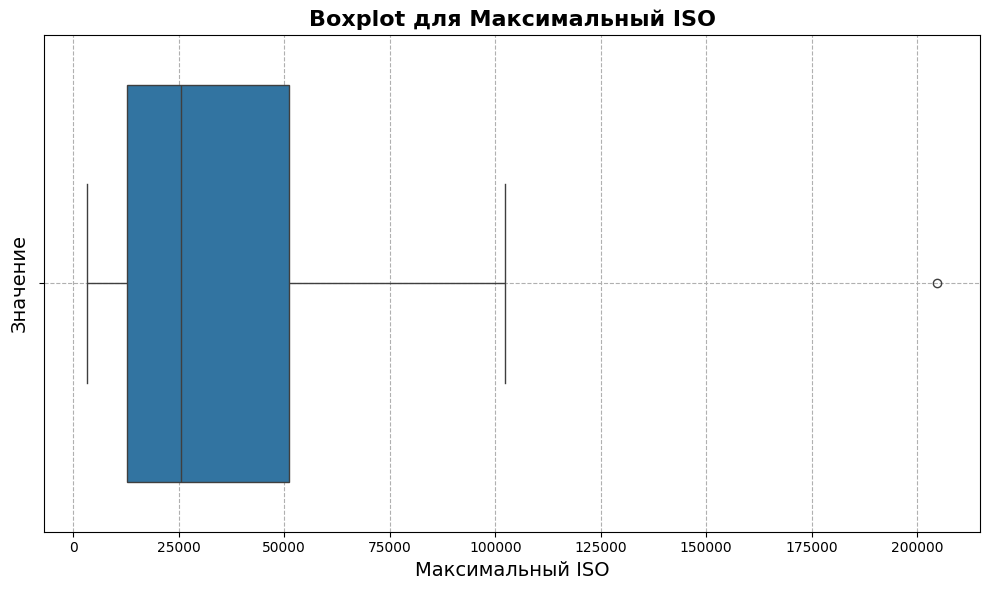

Анализ для Максимальный расширенный диапазон ISO:
  Q1 (25-й процентиль): 25600.0
  Медиана (50-й процентиль): 51200.0
  Q3 (75-й процентиль): 102400.0
  Интерквартильный размах (IQR): 76800.0
  Нижняя граница для выбросов: -89600.0
  Верхняя граница для выбросов: 217600.0


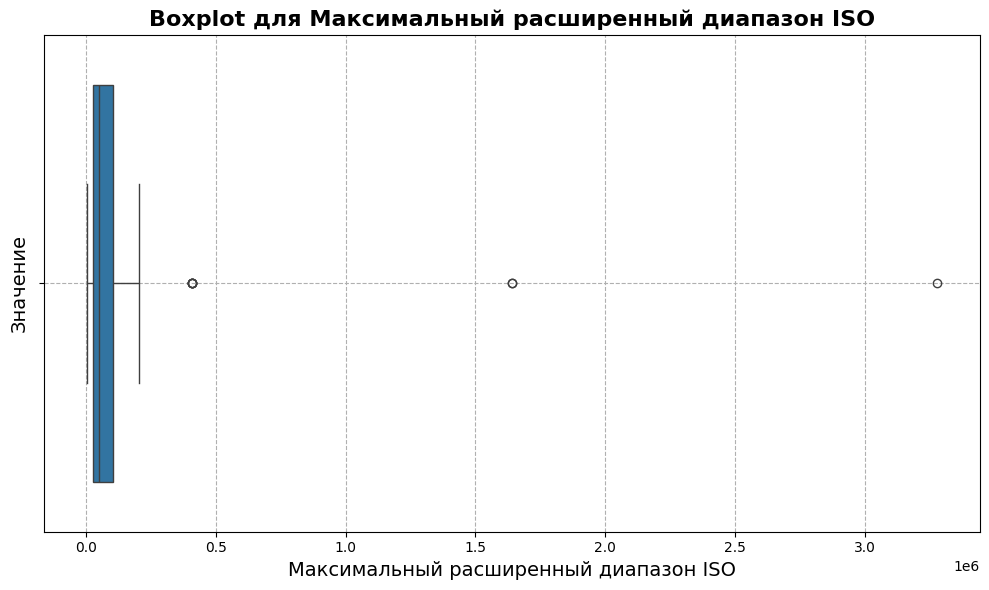

Анализ для Время работы батареи (shots):
  Q1 (25-й процентиль): 365.0
  Медиана (50-й процентиль): 440.0
  Q3 (75-й процентиль): 635.0
  Интерквартильный размах (IQR): 270.0
  Нижняя граница для выбросов: -40.0
  Верхняя граница для выбросов: 1040.0


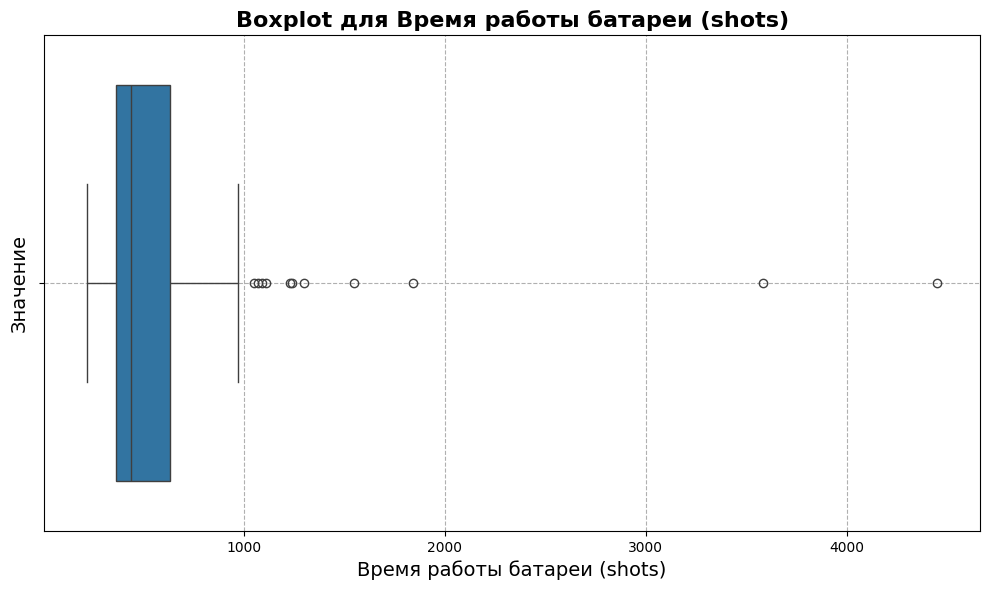

Анализ для Емкость аккумулятора:
  Q1 (25-й процентиль): 1200.0
  Медиана (50-й процентиль): 1860.0
  Q3 (75-й процентиль): 2200.0
  Интерквартильный размах (IQR): 1000.0
  Нижняя граница для выбросов: -300.0
  Верхняя граница для выбросов: 3700.0


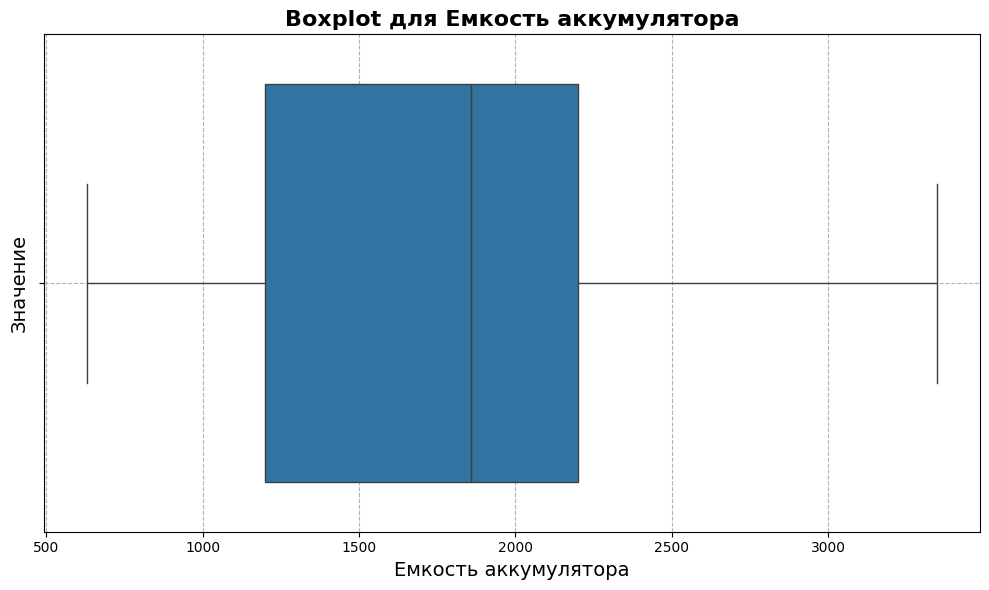

Анализ для Вес (в kg):
  Q1 (25-й процентиль): 0.475
  Медиана (50-й процентиль): 0.6395
  Q3 (75-й процентиль): 0.739
  Интерквартильный размах (IQR): 0.264
  Нижняя граница для выбросов: 0.07899999999999996
  Верхняя граница для выбросов: 1.135


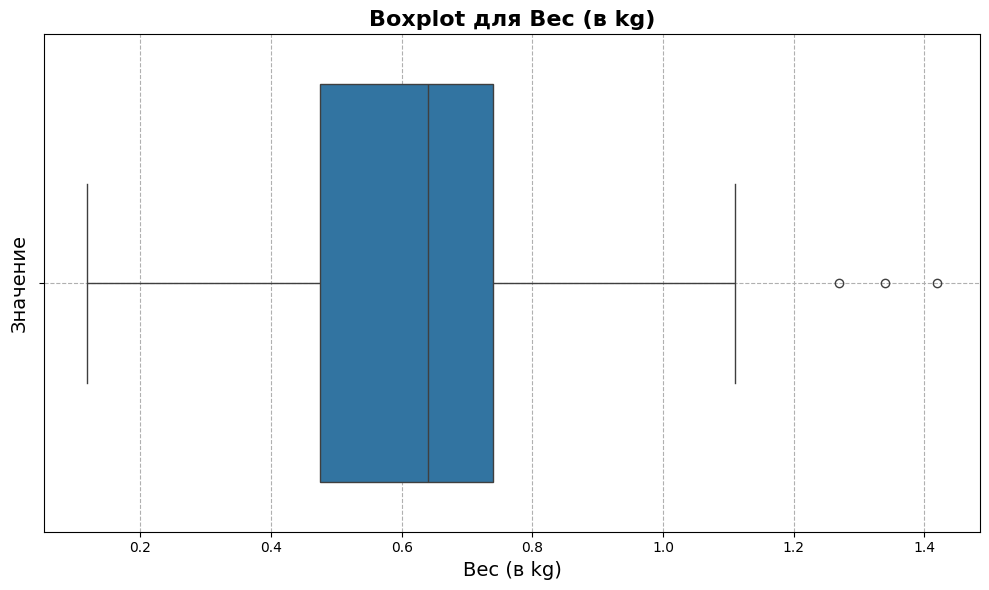

Анализ для Размер экрана (без "):
  Q1 (25-й процентиль): 3.0
  Медиана (50-й процентиль): 3.0
  Q3 (75-й процентиль): 3.1500000000000004
  Интерквартильный размах (IQR): 0.15000000000000036
  Нижняя граница для выбросов: 2.7749999999999995
  Верхняя граница для выбросов: 3.375000000000001


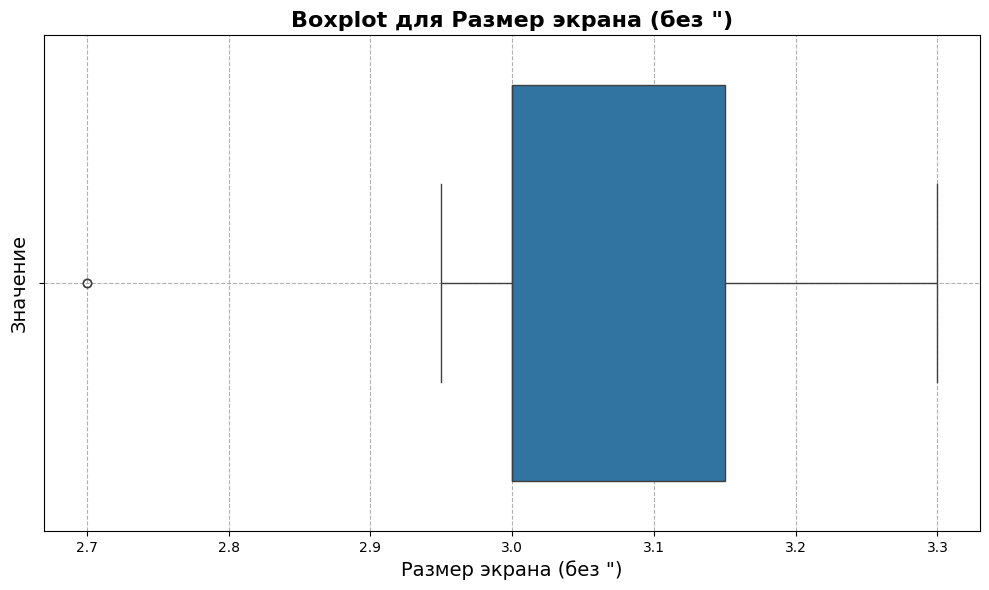

Анализ для Мегапиксели (основная камера):
  Q1 (25-й процентиль): 20.1
  Медиана (50-й процентиль): 24.2
  Q3 (75-й процентиль): 26.1
  Интерквартильный размах (IQR): 6.0
  Нижняя граница для выбросов: 11.100000000000001
  Верхняя граница для выбросов: 35.1


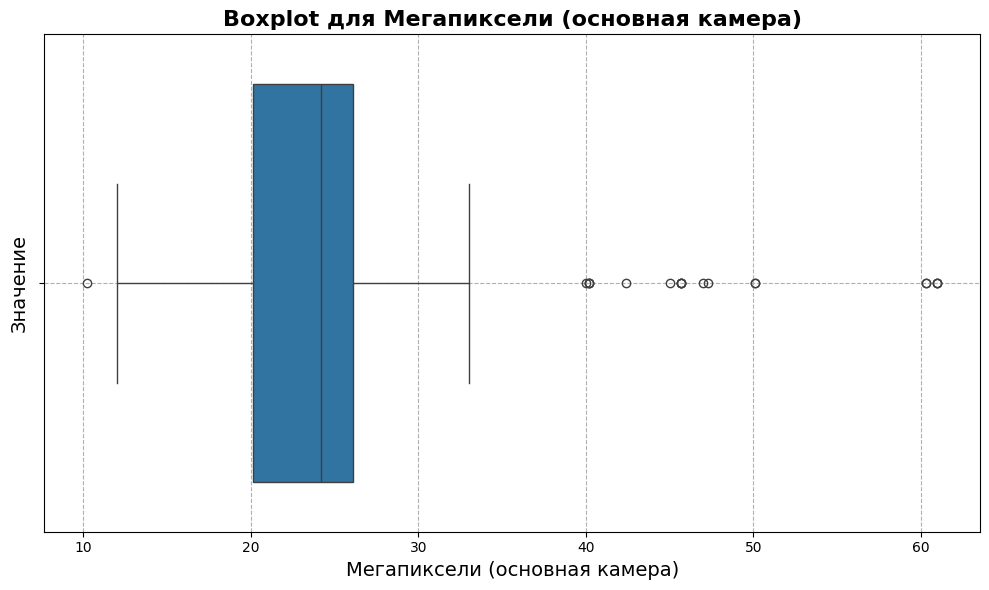

Анализ для Непрерывная сьемка FPS:
  Q1 (25-й процентиль): 7.0
  Медиана (50-й процентиль): 10.0
  Q3 (75-й процентиль): 12.0
  Интерквартильный размах (IQR): 5.0
  Нижняя граница для выбросов: -0.5
  Верхняя граница для выбросов: 19.5


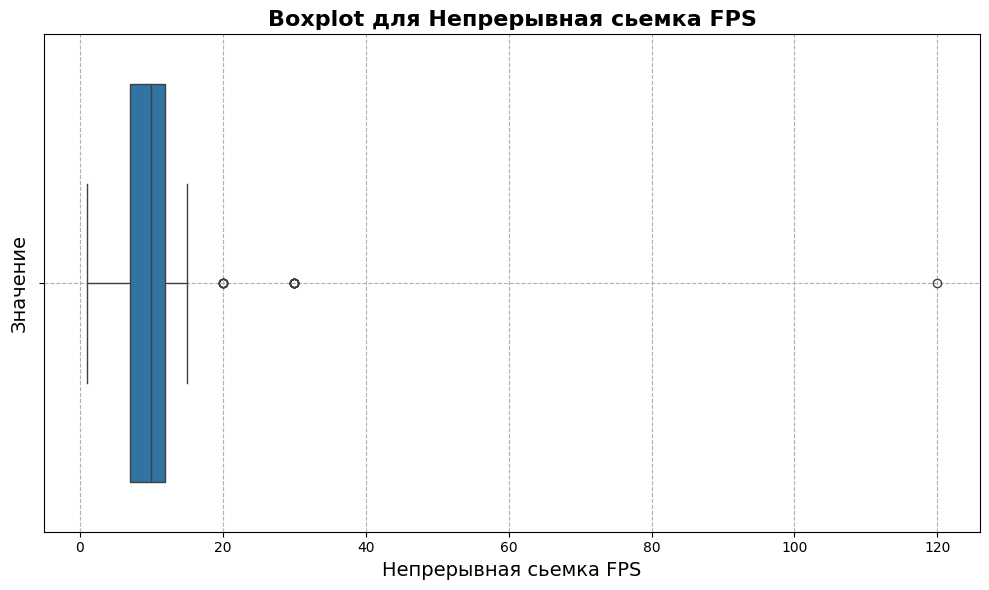

In [10]:
df_num = df[continuous_cols].dropna()
for col in continuous_cols:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    median = df_num[col].median()
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f'Анализ для {col}:')
    print(f'  Q1 (25-й процентиль): {Q1}')
    print(f'  Медиана (50-й процентиль): {median}')
    print(f'  Q3 (75-й процентиль): {Q3}')
    print(f'  Интерквартильный размах (IQR): {IQR}')
    print(f'  Нижняя граница для выбросов: {lower_bound}')
    print(f'  Верхняя граница для выбросов: {upper_bound}')

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_num[col])
    plt.title(f'Boxplot для {col}', fontsize=16, fontweight='bold')
    plt.xlabel(f'{col}', fontsize=14)
    plt.ylabel('Значение', fontsize=14)
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()

#Обычная МНК модель

In [11]:
df=df[(df['Название ']!='Nikon D6')&(df['Название ']!='Nikon D500')&(df['Название ']!='Nikon D7500')&(df['Название ']!='Leica SL3')] #удаление выбросов
categorical_vars = ['Производитель', 'Наличие пыле/влаго защиты', 'Видеозапись fps ', 'Видео (качество)']
continuous_vars = ['Максимальный ISO', 'Максимальный расширенный диапазон ISO', 'Время работы батареи (shots)', 'Емкость аккумулятора', 'Вес (в kg)', 'Размер экрана (без ")', 'Мегапиксели (основная камера)', 'Непрерывная сьемка FPS' ]

df[categorical_vars] = df[categorical_vars].astype(str)
df['Цена'] = pd.to_numeric(df['Цена'], errors='coerce')
df_model = df[categorical_vars + continuous_vars + ['Цена']].dropna().copy()
df_dummies = pd.get_dummies(df_model[categorical_vars], drop_first=True)
X = pd.concat([df_model[continuous_vars], df_dummies], axis=1).astype(float)
y = df_model['Цена'].astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     12.41
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.18e-17
Time:                        18:43:55   Log-Likelihood:                -1239.8
No. Observations:                  99   AIC:                             2526.
Df Residuals:                      76   BIC:                             2585.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<ipython-input-11-0fb72c28873b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_vars] = df[categorical_vars].astype(str)
<ipython-input-11-0fb72c28873b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Цена'] = pd.to_numeric(df['Цена'], errors='coerce')


##Проверка предпосылок ТГМ


###Построение 4 моделей - линейной, с логарифмированными регрессорами, с логарифмированным таргетом и лог-лог.


In [12]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np
import pandas as pd
categorical_cols = ['Производитель', 'Наличие пыле/влаго защиты', 'Видеозапись fps ', 'Видео (качество)']
numerical_cols =  ['Максимальный ISO', 'Максимальный расширенный диапазон ISO', 'Время работы батареи (shots)', 'Емкость аккумулятора', 'Вес (в kg)', 'Размер экрана (без ")', 'Мегапиксели (основная камера)', 'Непрерывная сьемка FPS' ]
target_col = 'Цена'
df = df[categorical_cols + numerical_cols + [target_col]].dropna()
X_all = df[categorical_cols + numerical_cols]
y_all = df[target_col]
y_all_log = np.log(y_all)
X_cat = pd.get_dummies(X_all[categorical_cols], drop_first=True)
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_all[numerical_cols]),
                     columns=numerical_cols, index=X_all.index)

X_log = pd.DataFrame(np.log1p(X_all[numerical_cols]),
                     columns=numerical_cols, index=X_all.index)

X_log_scaled = pd.DataFrame(scaler.fit_transform(X_log),
                            columns=numerical_cols, index=X_all.index)

X1 = sm.add_constant(pd.concat([X_num, X_cat], axis=1))
X2 = sm.add_constant(pd.concat([X_log_scaled, X_cat], axis=1))

X1 = X1.astype(float)
X2 = X2.astype(float)
y_all = pd.to_numeric(y_all, errors='coerce').astype(float)
y_all_log = np.log(y_all)

mdl_1 = sm.OLS(y_all, X1).fit()
mdl_2 = sm.OLS(y_all, X2).fit()
mdl_3 = sm.OLS(y_all_log, X1).fit()
mdl_4 = sm.OLS(y_all_log, X2).fit()

print("Результаты линейной модели:")
print(mdl_1.summary())

print("\nРезультаты модели с логарифмическими признаками X:")
print(mdl_2.summary())

print("\nРезультаты модели с логарифмированным таргетом:")
print(mdl_3.summary())

print("\nРезультаты модели с логарифмированными признаками и таргетом:")
print(mdl_4.summary())

Результаты линейной модели:
                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     12.41
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.18e-17
Time:                        18:43:55   Log-Likelihood:                -1239.8
No. Observations:                  99   AIC:                             2526.
Df Residuals:                      76   BIC:                             2585.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

#Проверка на нормальность ошибок
Спойлер - ошибки не нормально распределены, а значит придется использовать бутстрап или робастные оценки для будущих тестов.

In [13]:
linear_residuals = y_all - mdl_1.predict(X1)
log_part_residuals = y_all - mdl_2.predict(X2)
linear_log_residuals = y_all_log - mdl_3.predict(X1)
log_log_residuals = y_all_log - mdl_4.predict(X2)

def test_normality(residuals):
    jarque_bera_result = stats.jarque_bera(residuals)
    ks_result = stats.kstest(residuals, 'norm')

    return pd.Series({
        'Jarque-Bera p-value': jarque_bera_result[1],
        'Kolmogorov-Smirnov p-value': ks_result[1]
    })

linear_normality_results = test_normality(linear_residuals)
log_part_normality_results = test_normality(log_part_residuals)
linear_log_normality_results = test_normality(linear_log_residuals)
log_log_normality_results = test_normality(log_log_residuals)

print("Результаты теста на нормальность (Jarque-Bera и Kolmogorov-Smirnov):\n")
print(f"Линейная модель:")
print(f"Jarque-Bera p-value: {linear_normality_results['Jarque-Bera p-value']}")
print(f"Kolmogorov-Smirnov p-value: {linear_normality_results['Kolmogorov-Smirnov p-value']}\n")
print(f"Модель с логарифмированными признаками X:")
print(f"Jarque-Bera p-value: {log_part_normality_results['Jarque-Bera p-value']}")
print(f"Kolmogorov-Smirnov p-value: {log_part_normality_results['Kolmogorov-Smirnov p-value']}\n")
print(f"Модель с логарифмированным таргетом:")
print(f"Jarque-Bera p-value: {linear_log_normality_results['Jarque-Bera p-value']}")
print(f"Kolmogorov-Smirnov p-value: {linear_log_normality_results['Kolmogorov-Smirnov p-value']}\n")
print(f"Модель с логарифмированными признаками и таргетом:")
print(f"Jarque-Bera p-value: {log_log_normality_results['Jarque-Bera p-value']}")
print(f"Kolmogorov-Smirnov p-value: {log_log_normality_results['Kolmogorov-Smirnov p-value']}")

Результаты теста на нормальность (Jarque-Bera и Kolmogorov-Smirnov):

Линейная модель:
Jarque-Bera p-value: 2.8904702881056145e-42
Kolmogorov-Smirnov p-value: 6.283238234818095e-25

Модель с логарифмированными признаками X:
Jarque-Bera p-value: 2.259353213367746e-12
Kolmogorov-Smirnov p-value: 6.283238234818095e-25

Модель с логарифмированным таргетом:
Jarque-Bera p-value: 2.3443816151461353e-12
Kolmogorov-Smirnov p-value: 8.442635114436493e-06

Модель с логарифмированными признаками и таргетом:
Jarque-Bera p-value: 9.631553205753028e-09
Kolmogorov-Smirnov p-value: 2.578696027373478e-06


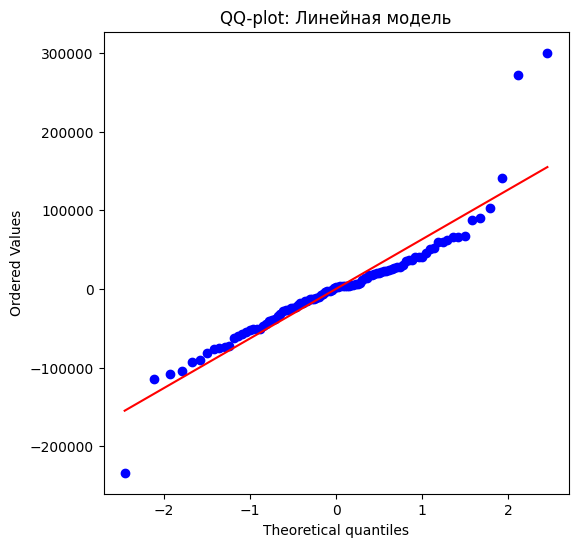

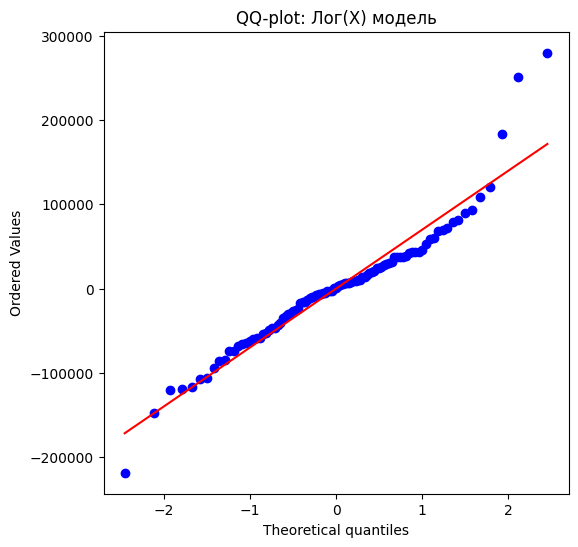

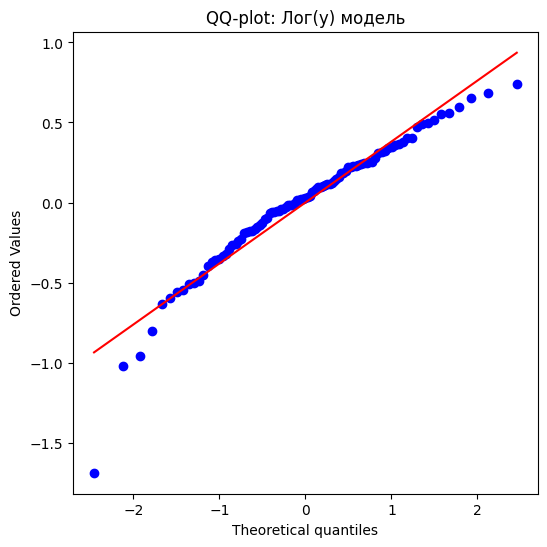

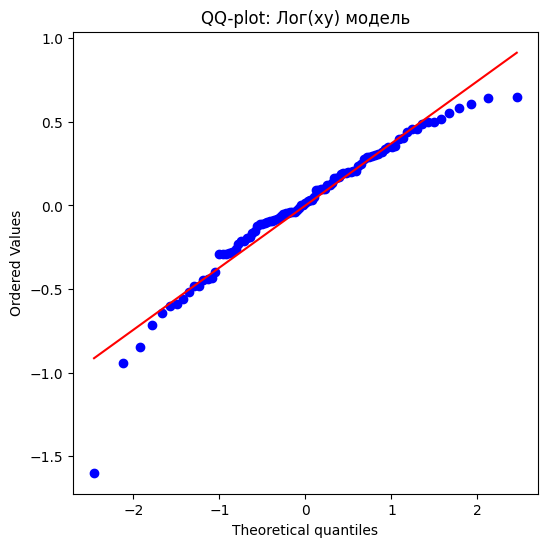

In [14]:
def plot_qq(residuals, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=ax)
    ax.set_title(title)
    plt.show()

plot_qq(linear_residuals, 'QQ-plot: Линейная модель')
plot_qq(log_part_residuals, 'QQ-plot: Лог(X) модель')
plot_qq(linear_log_residuals, 'QQ-plot: Лог(y) модель')
plot_qq(log_log_residuals, 'QQ-plot: Лог(xy) модель')

#Ковариационная матрица регрессоров для предварительной оценки мультиколлинеарности и рассчет VIF

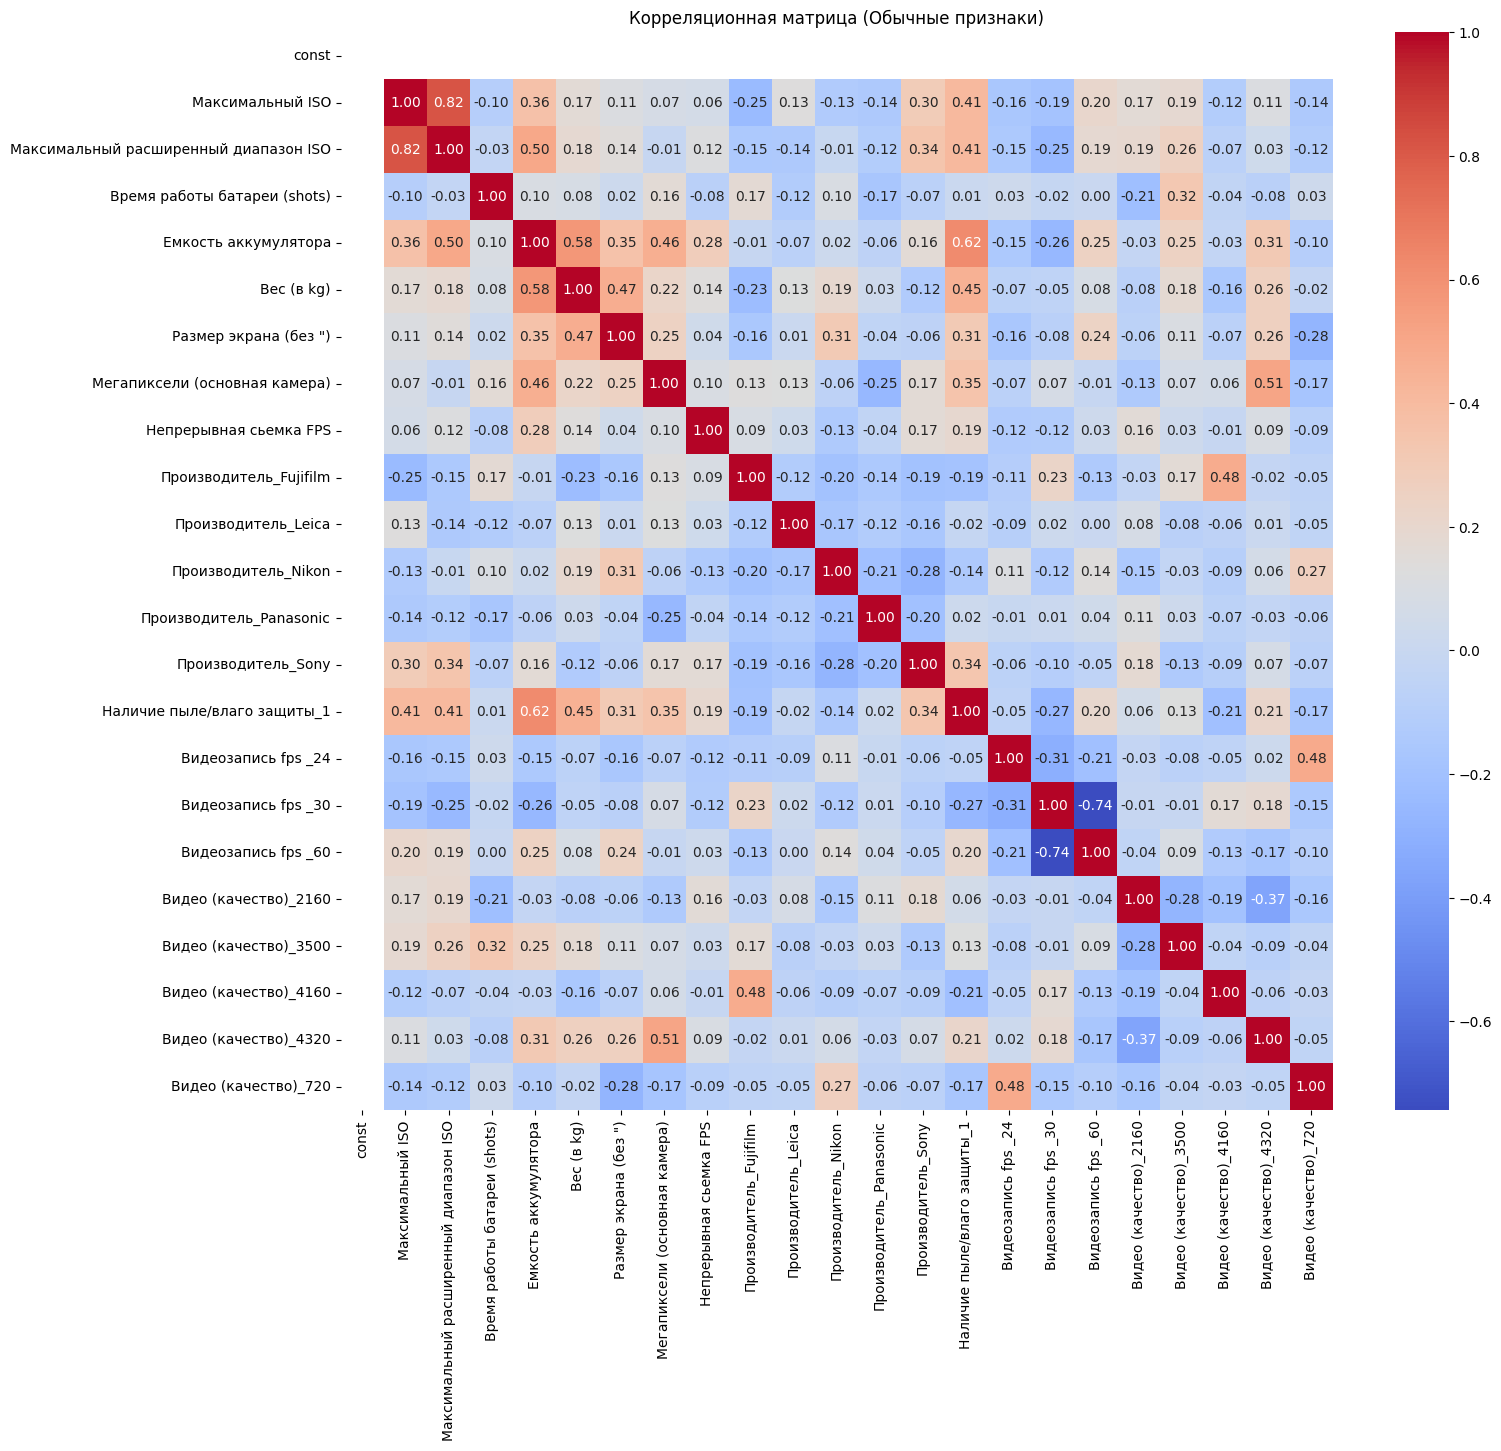

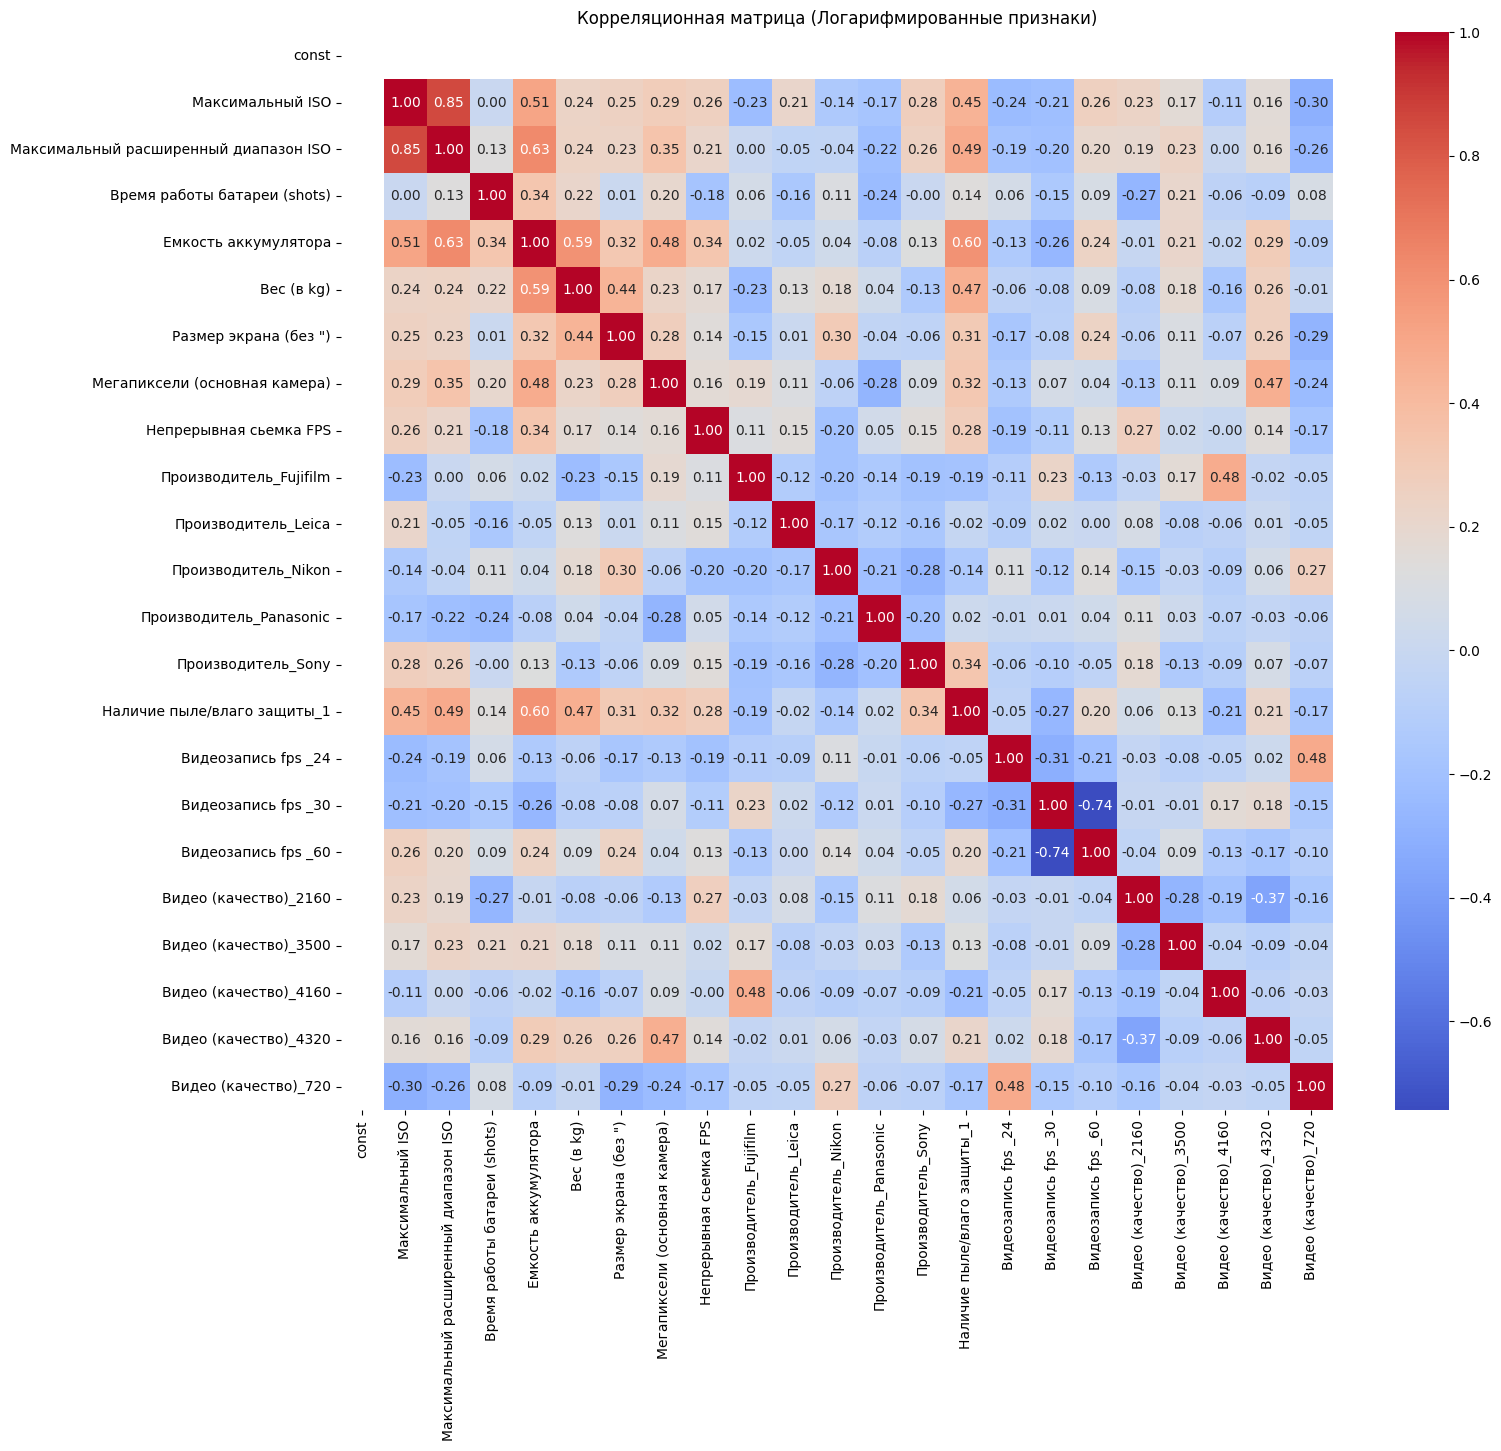

In [15]:
correlation_matrix_X1 = X1.corr()
correlation_matrix_X2 = X2.corr()

def plot_correlation_matrix(data, title):
    plt.figure(figsize=(16, 14))
    sns.heatmap(data, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(title)
    plt.show()

plot_correlation_matrix(correlation_matrix_X1, 'Корреляционная матрица (Обычные признаки)')
plot_correlation_matrix(correlation_matrix_X2, 'Корреляционная матрица (Логарифмированные признаки)')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_data_1 = calculate_vif(X1)
vif_data_2 = calculate_vif(X2)

result = pd.concat([vif_data_1, vif_data_2['VIF']], axis=1)
result.columns = ['feature', 'VIF', 'VIF_ln']

result

,feature,VIF,VIF_ln
0,const,38.720759,36.849692
1,Максимальный ISO,4.933901,7.803516
2,Максимальный расширенный диапазон ISO,6.135962,7.538994
3,Время работы батареи (shots),1.376863,1.782991
4,Емкость аккумулятора,3.949559,4.166943
5,Вес (в kg),2.402282,2.584876
6,"Размер экрана (без "")",1.853905,1.829189
7,Мегапиксели (основная камера),2.619602,2.198487
8,Непрерывная сьемка FPS,1.356133,1.632561
9,Производитель_Fujifilm,2.399760,2.809241


#Тесты на гетероскедастичность  (успешно прошла только лог-лог модель)

In [17]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import pandas as pd

def test_heteroskedasticity(model, X, y, model_name):
    residuals = model.resid
    fitted_values = model.fittedvalues
    bp_test = het_breuschpagan(residuals, X)
    bp_pvalue = bp_test[1]
    white_test = het_white(residuals, X)
    white_pvalue = white_test[1]

    print(f"Результаты для модели {model_name}:")
    print(f"  Breusch-Pagan p-value: {bp_pvalue}")
    print(f"  White's test p-value: {white_pvalue}")
    print("-" * 50)

X1 = sm.add_constant(X1)
mdl_1 = sm.OLS(y_all, X1).fit()
X2 = sm.add_constant(X2)
mdl_2 = sm.OLS(y_all, X2).fit()
mdl_3 = sm.OLS(y_all_log, X2).fit()

test_heteroskedasticity(mdl_1, X1, y_all, 'Линейная модель')
test_heteroskedasticity(mdl_2, X2, y_all, 'Логарифмированная модель')
test_heteroskedasticity(mdl_3, X2, y_all_log, 'Лог-лог')

Результаты для модели Линейная модель:
  Breusch-Pagan p-value: 0.04747767429383432
  White's test p-value: 0.4527212632423215
--------------------------------------------------
Результаты для модели Логарифмированная модель:
  Breusch-Pagan p-value: 0.016185714381707288
  White's test p-value: 0.4527212632423215
--------------------------------------------------
Результаты для модели Лог-лог:
  Breusch-Pagan p-value: 0.5933005308419648
  White's test p-value: 0.4527212632423215
--------------------------------------------------


#Тест Вилкоксона (используется вместо t-теста, так как не требует нормальности остатков)

In [18]:
from scipy.stats import wilcoxon

def wilcoxon_test_h0_mu(obs, h0_mu=0, alpha=0.05):
    shifted_obs = obs - h0_mu
    stat, p_value = wilcoxon(shifted_obs)
    ci_lower = np.percentile(obs, alpha/2 * 100)
    ci_upper = np.percentile(obs, (1 - alpha/2) * 100)
    return p_value, ci_lower, ci_upper

linear_residuals = mdl_1.resid
log_part_residuals = mdl_2.resid
log_log_residuals = mdl_3.resid

p_wilcox, ci_lo, ci_hi = wilcoxon_test_h0_mu(linear_residuals)
print("Wilcoxon тест для линейной модели:")
print(f"P-value: {p_wilcox:.5f}")
print(f"95% доверительный интервал (percentile CI): ({ci_lo:.5f}, {ci_hi:.5f})\n")

p_wilcox_logx, ci_lo_logx, ci_hi_logx = wilcoxon_test_h0_mu(log_part_residuals)
print("Wilcoxon тест для модели с логарифмированными признаками X:")
print(f"P-value: {p_wilcox_logx:.5f}")
print(f"95% доверительный интервал (percentile CI): ({ci_lo_logx:.5f}, {ci_hi_logx:.5f})\n")

p_wilcox_loglog, ci_lo_loglog, ci_hi_loglog = wilcoxon_test_h0_mu(log_log_residuals)
print("Wilcoxon тест для лог-лог модели:")
print(f"P-value: {p_wilcox_loglog:.5f}")
print(f"95% доверительный интервал (percentile CI): ({ci_lo_loglog:.5f}, {ci_hi_loglog:.5f})")


Wilcoxon тест для линейной модели:
P-value: 0.71661
95% доверительный интервал (percentile CI): (-106401.22197, 123619.93726)

Wilcoxon тест для модели с логарифмированными признаками X:
P-value: 0.84504
95% доверительный интервал (percentile CI): (-119869.42234, 155270.57751)

Wilcoxon тест для лог-лог модели:
P-value: 0.50277
95% доверительный интервал (percentile CI): (-0.78607, 0.59391)


#Бутстрэп тест используется вместо обычного z-теста, в силу устойчивости к ненормальному распределнию остатков

In [19]:
import numpy as np

def bootstrap_mean_test(data, expected_mean, alpha=0.05, n_bootstrap=10000, seed=42):
    np.random.seed(seed)
    sample_means = []

    for _ in range(n_bootstrap):
        resample = np.random.choice(data, size=len(data), replace=True)
        sample_means.append(np.mean(resample))

    sample_means = np.array(sample_means)
    observed_mean = np.mean(data)
    abs_diff = np.abs(sample_means - expected_mean)
    p_value = np.mean(abs_diff >= np.abs(observed_mean - expected_mean))
    ci_lower = np.percentile(sample_means, 100 * (alpha / 2))
    ci_upper = np.percentile(sample_means, 100 * (1 - alpha / 2))

    if expected_mean < ci_lower or expected_mean > ci_upper:
        hypothesis_result = "Отвергаем H0"
    else:
        hypothesis_result = "Не отвергаем H0"

    return observed_mean, p_value, (ci_lower, ci_upper), hypothesis_result
residuals_model_1 = mdl_1.resid
residuals_model_2 = mdl_2.resid
residuals_model_3 = mdl_3.resid

In [20]:
obs_mean_1, pval_1, ci_1, res_1 = bootstrap_mean_test(residuals_model_1, expected_mean=0)
obs_mean_2, pval_2, ci_2, res_2 = bootstrap_mean_test(residuals_model_2, expected_mean=0)
obs_mean_3, pval_3, ci_3, res_3 = bootstrap_mean_test(residuals_model_3, expected_mean=0)

print(f"Линейная модель: p-value = {pval_1}, 95% CI = {ci_1}, результат: {res_1}")
print(f"Логарифмированная модель: p-value = {pval_2}, 95% CI = {ci_2}, результат: {res_2}")
print(f"Лог-лог модель: p-value = {pval_3}, 95% CI = {ci_3}, результат: {res_3}")


Линейная модель: p-value = 1.0, 95% CI = (np.float64(-12584.014615310582), np.float64(13474.11980693561)), результат: Не отвергаем H0
Логарифмированная модель: p-value = 1.0, 95% CI = (np.float64(-13835.909770920018), np.float64(14239.682247501016)), результат: Не отвергаем H0
Лог-лог модель: p-value = 1.0, 95% CI = (np.float64(-0.07597218018166231), np.float64(0.07142744992789983)), результат: Не отвергаем H0


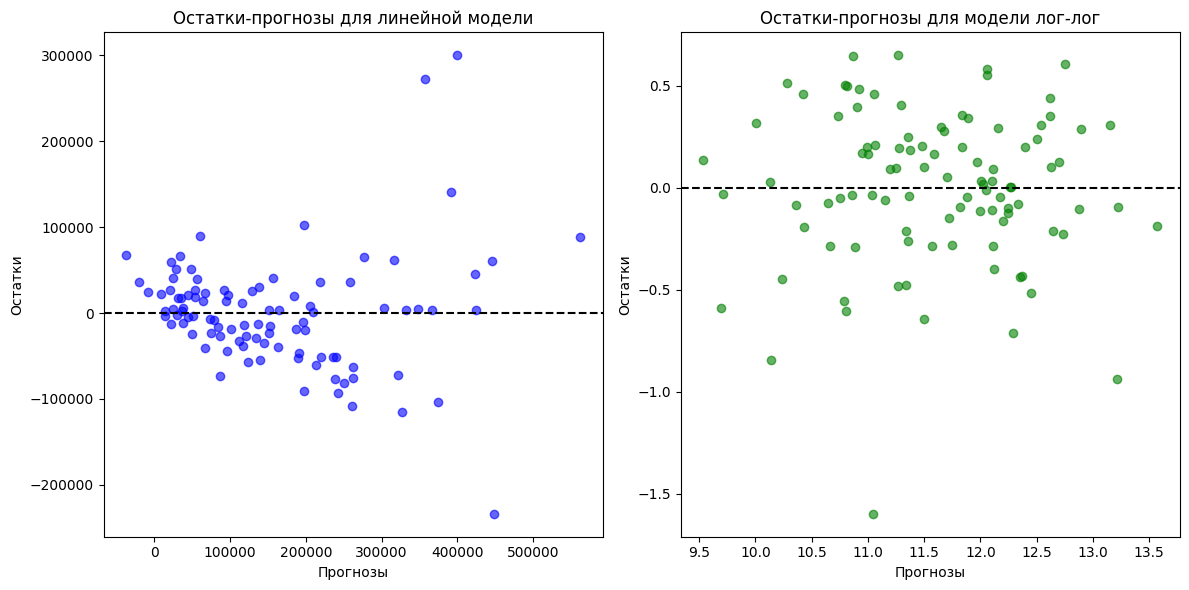

In [21]:
import matplotlib.pyplot as plt
predictions_model_1 = mdl_1.fittedvalues
predictions_model_3 = mdl_3.fittedvalues
residuals_model_1 = mdl_1.resid
residuals_model_3 = mdl_3.resid
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(predictions_model_1, residuals_model_1, color='blue', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Остатки-прогнозы для линейной модели")
plt.xlabel("Прогнозы")
plt.ylabel("Остатки")

plt.subplot(1, 2, 2)
plt.scatter(predictions_model_3, residuals_model_3, color='green', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Остатки-прогнозы для модели лог-лог")
plt.xlabel("Прогнозы")
plt.ylabel("Остатки")

plt.tight_layout()
plt.show()

In [22]:
mdl_loglog = sm.OLS(y_all_log, X2).fit()

#Тест Рамсея на правильную спецификацию модели (успещен только при добавлении полиномов больших степеней)

In [23]:
def ramsey_reset_robust_extended(model, X, y, degrees_yhat=[2], add_regressor_powers=True, max_power=2, cov_type='HC3'):
    y_hat = model.fittedvalues
    X_reset = X.copy()
    for deg in degrees_yhat:
        X_reset[f'yhat^{deg}'] = y_hat ** deg
    if add_regressor_powers:
        for col in X.columns:
            if np.issubdtype(X[col].dtype, np.number):
                for p in range(2, max_power + 1):
                    X_reset[f'{col}^{p}'] = X[col] ** p
    model_augmented = sm.OLS(y, X_reset).fit(cov_type=cov_type)
    model_base = sm.OLS(y, X).fit(cov_type=cov_type)
    f_stat, p_value, df_diff = model_augmented.compare_f_test(model_base)
    return {'F-stat': f_stat, 'p-value': p_value, 'df_diff': df_diff}
reset_robust_result = ramsey_reset_robust_extended(mdl_loglog, X2, y_all_log)
print("RESET-тест Рамсея с робастными ошибками (HC3) для лог-лог модели:")
print(f"F-статистика: {reset_robust_result['F-stat']:.4f}")
print(f"p-value: {reset_robust_result['p-value']:.6f}")

RESET-тест Рамсея с робастными ошибками (HC3) для лог-лог модели:
F-статистика: 1.7733
p-value: 0.089846


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:2274: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


#Финальная модель и отбор значимых признаков

In [24]:
mdl_loglog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Цена   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     17.93
Date:                Thu, 08 May 2025   Prob (F-statistic):           9.68e-22
Time:                        18:44:01   Log-Likelihood:                -43.216
No. Observations:                  99   AIC:                             132.4
Df Residuals:                      76   BIC:                             192.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    11.2355      0.261     43.096      0.000      10.716      11.755
Максимальный ISO                         -0.0082      0.120     -0.068      0.946      -0.247       0.231
Максимальный расширенный диапазон ISO     0.1218      0.118      1.033      0.305      -0.113       0.357
Время работы батареи (shots)              0.0836      0.057      1.458      0.149      -0.031       0.198
Емкость аккумулятора                      0.2067      0.088      2.358      0.021       0.032       0.381
Вес (в kg)                                0.2099      0.069      3.039      0.003       0.072       0.347
Размер экрана (без ")                     0.0254      0.058      0.438      0.663      -0.090       0.141
Мегапиксели (основная камера)             0.0759      0.064      1.192      0.237      -0.051       0.203
Непрерывная сьемка FPS                    0.0066      0.055      0.120      0.905      -0.103       0.116
Производитель_Fujifilm                    0.1714      0.221      0.777      0.440      -0.268       0.611
Производитель_Leica                       1.2788      0.202      6.332      0.000       0.877       1.681
Производитель_Nikon                       0.0956      0.154      0.622      0.536      -0.210       0.402
Производитель_Panasonic                   0.0314      0.176      0.178      0.859      -0.320       0.382
Производитель_Sony                        0.3428      0.157      2.184      0.032       0.030       0.655
Наличие пыле/влаго защиты_1              -0.1612      0.134     -1.201      0.233      -0.429       0.106
Видеозапись fps _24                      -0.4462      0.299     -1.494      0.139      -1.041       0.149
Видеозапись fps _30                      -0.4095      0.234     -1.751      0.084      -0.875       0.056
Видеозапись fps _60                      -0.3027      0.225     -1.346      0.182      -0.751       0.145
Видео (качество)_2160                     0.6899      0.155      4.454      0.000       0.381       0.998
Видео (качество)_3500                     0.9718      0.248      3.915      0.000       0.477       1.466
Видео (качество)_4160                     0.9626      0.345      2.790      0.007       0.275       1.650
Видео (качество)_4320                     1.1534      0.260      4.434      0.000       0.635       1.671
Видео (качество)_720                     -0.4810      0.411     -1.170      0.246      -1.300       0.338
==============================================================================
Omnibus:                       22.730   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.916
Skew:                          -0.986   Prob(JB):                     9.63e-09
Kurtosis:  

In [25]:
significant_features = [
    'Емкость аккумулятора','Вес (в kg)',
    'Производитель_Leica',
    'Видео (качество)_2160',
    'Видео (качество)_3500',
    'Видео (качество)_4160',
    'Видео (качество)_4320', 'Видео (качество)_720', 'Производитель_Sony', 'const'
]
mdl_loglog_sig = sm.OLS(y_all_log, X2[significant_features]).fit()
mdl_loglog_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Цена   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     41.10
Date:                Thu, 08 May 2025   Prob (F-statistic):           5.74e-28
Time:                        18:44:01   Log-Likelihood:                -52.265
No. Observations:                  99   AIC:                             124.5
Df Residuals:                      89   BIC:                             150.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Емкость аккумулятора      0.3758      0.060      6.290      0.000       0.257       0.495
Вес (в kg)                0.1543      0.059      2.634      0.010       0.038       0.271
Производитель_Leica       1.2817      0.158      8.135      0.000       0.969       1.595
Видео (качество)_2160     0.6660      0.110      6.054      0.000       0.447       0.885
Видео (качество)_3500     1.0587      0.209      5.054      0.000       0.642       1.475
Видео (качество)_4160     1.0856      0.272      3.990      0.000       0.545       1.626
Видео (качество)_4320     1.0994      0.177      6.214      0.000       0.748       1.451
Видео (качество)_720     -0.6863      0.319     -2.149      0.034      -1.321      -0.052
Производитель_Sony        0.3359      0.116      2.896      0.005       0.105       0.566
const                    10.8499      0.094    114.991      0.000      10.662      11.037
==============================================================================
Omnibus:                        9.343   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.672
Skew:                          -0.600   Prob(JB):                      0.00794
Kurtosis:                       3.951   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Предсказание для нового наблюдения
####Предсказываем значение, используя модель со значимыми регрессорами


In [26]:
new_camera = {
    'Емкость аккумулятора': 1900,
    'Вес (в kg)': 0.72,
    'Производитель': 'Leica',
    'Видео (качество)': '2160'
}
new_df = pd.DataFrame([new_camera])
X_cat = pd.get_dummies(new_df[['Производитель', 'Видео (качество)']])
expected_cols = [col for col in X2[significant_features].columns if col not in ['const', 'Емкость аккумулятора', 'Вес (в kg)']]
X_cat = X_cat.reindex(columns=expected_cols, fill_value=0)
X_numeric = new_df[['Емкость аккумулятора', 'Вес (в kg)']]
X_new_sig = pd.concat([X_numeric, X_cat], axis=1)
X_new_sig = sm.add_constant(X_new_sig, has_constant='add')
X_new_sig = X_new_sig.astype(float)
prediction = mdl_loglog_sig.get_prediction(X2[significant_features])
summary = prediction.summary_frame(alpha=0.05)
price_pred = np.exp(summary['mean'].values[0])
ci_lower = np.exp(summary['obs_ci_lower'].values[0])
ci_upper = np.exp(summary['obs_ci_upper'].values[0])
print(f"Предсказанная цена: {price_pred} ₽")
print(f"95% доверительный интервал: от {ci_lower} ₽ до {ci_upper} ₽")


Предсказанная цена: 237776.9974680443 ₽
95% доверительный интервал: от 94155.26565878604 ₽ до 600475.1845723516 ₽


#Модель квантильной регрессии


In [28]:
specific_quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
specific_quantile_results = {}

for q in specific_quantiles:
    model = sm.QuantReg(y_all_log, X2)
    result = model.fit(q=q, max_iter=1000000)
    specific_quantile_results[q] = result

quantile_summaries = {q: specific_quantile_results[q].summary() for q in specific_quantiles}
quantile_summaries

{0.1: <class 'statsmodels.iolib.summary.Summary'>
 """
                          QuantReg Regression Results                          
 Dep. Variable:                   Цена   Pseudo R-squared:               0.6677
 Model:                       QuantReg   Bandwidth:                      0.6367
 Method:                 Least Squares   Sparsity:                        1.863
 Date:                Thu, 08 May 2025   No. Observations:                   99
 Time:                        18:44:32   Df Residuals:                       76
                                         Df Model:                           22
                                             coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------------------------------------------
 const                                     9.7449      0.428     22.794      0.000       8.893      10.596
 Максимальный ISO                          0.1149      0.173    

In [29]:
price_quantiles = df['Цена'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
bins = [0] + list(price_quantiles.values) + [df['Цена'].max()]
quantile_levels = list(price_quantiles.index) + [1.0]
labels = [f"{int(q * 100)}%" for q in quantile_levels]
df['Quantile Group'] = pd.cut(df['Цена'], bins=bins, labels=labels, include_lowest=True)
quantile_grouped_prices = df.groupby('Quantile Group')['Цена'].apply(list)
quantile_grouped_prices


<ipython-input-29-72cefd3d501f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_grouped_prices = df.groupby('Quantile Group')['Цена'].apply(list)


,Цена
Quantile Group,
10%,"[17745, 27600, 15900, 12700, 28010, 26900, 108..."
20%,"[39000, 48789, 29064, 30449, 52000, 44430, 319..."
30%,"[70841, 67399, 64900, 66000, 59972, 53294, 727..."
40%,"[89900, 79990, 84479, 78284, 95255, 80390, 820..."
50%,"[106780, 104990, 118608, 96033, 119990, 106000..."
60%,"[127560, 123990, 137489, 127100, 137000, 14900..."
70%,"[153000, 168000, 169000, 168900, 155000, 16934..."
80%,"[197340, 179000, 188924, 186434, 199990, 20400..."
90%,"[343000, 295000, 309000, 299880, 214000, 25469..."


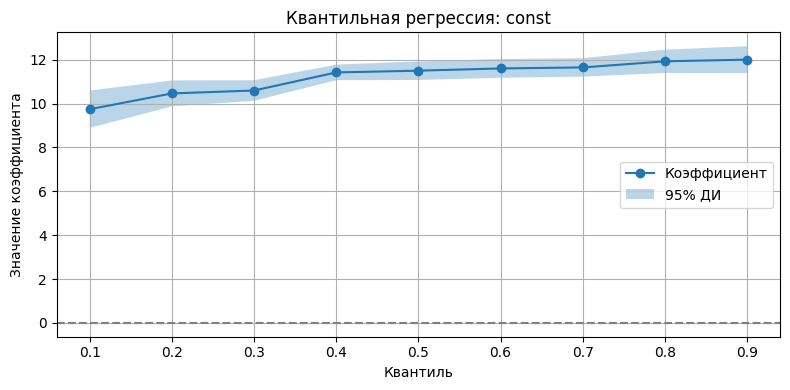

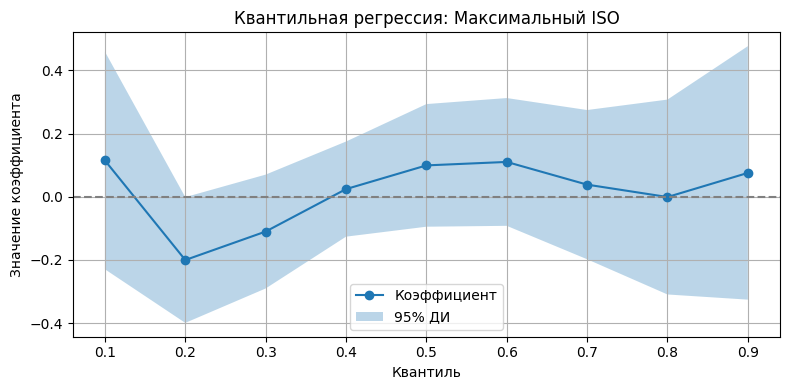

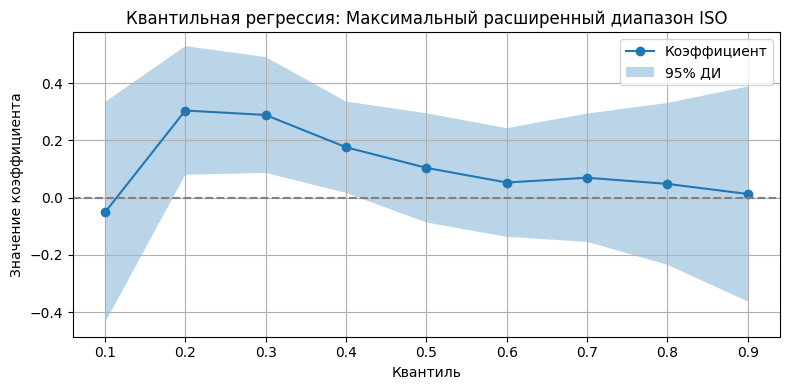

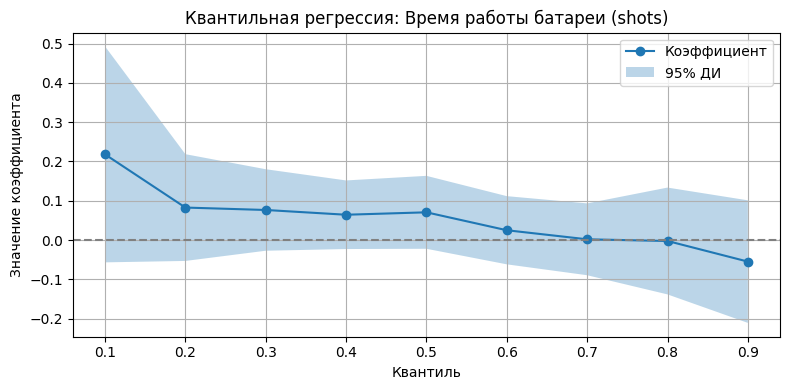

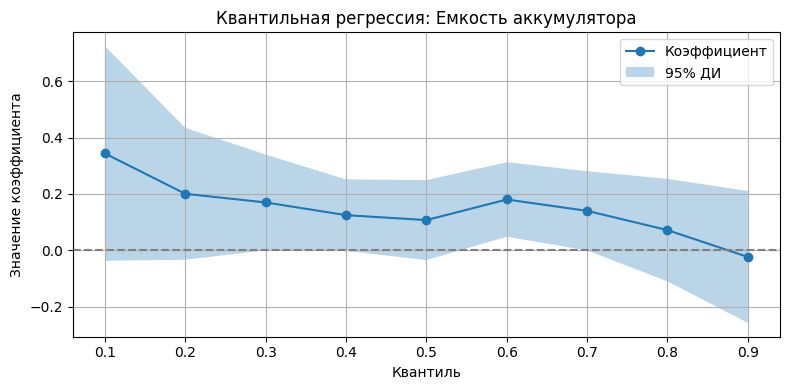

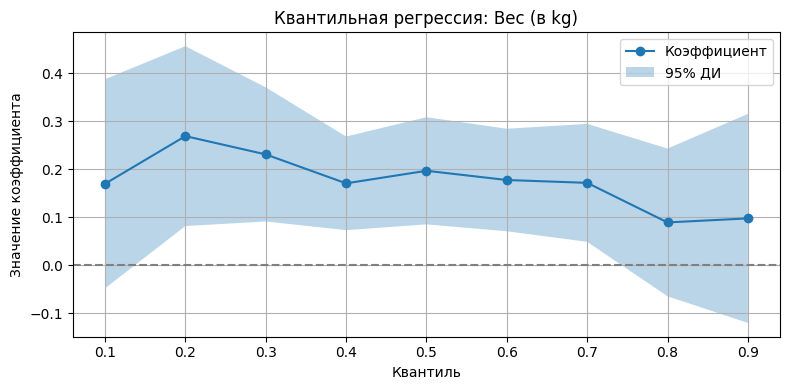

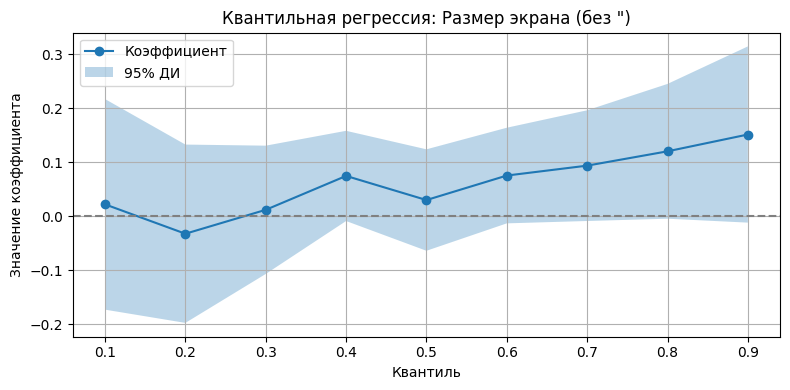

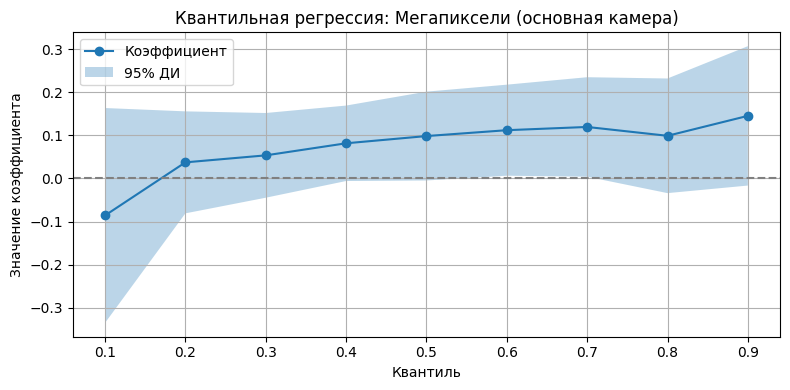

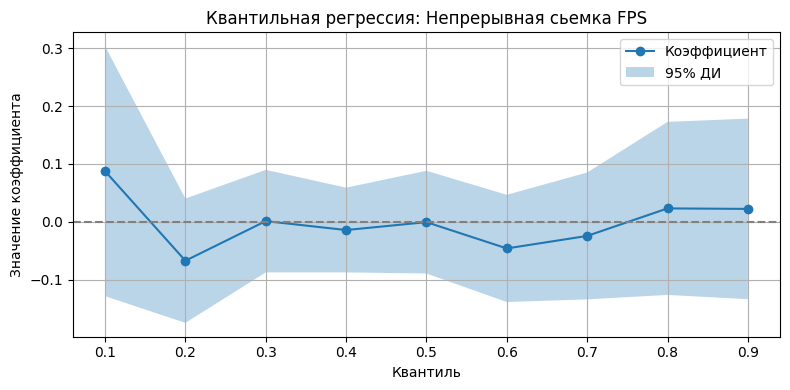

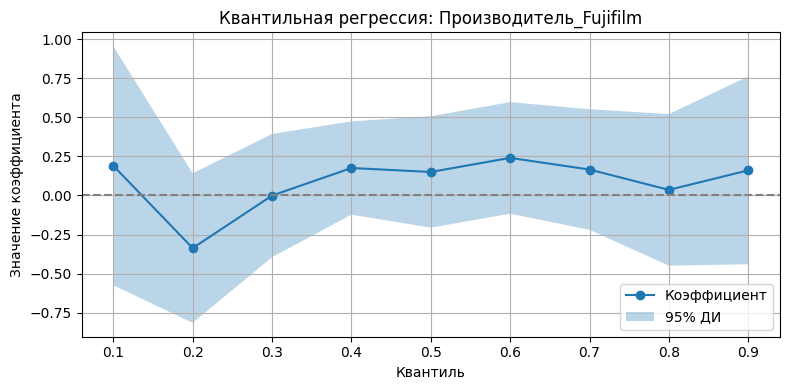

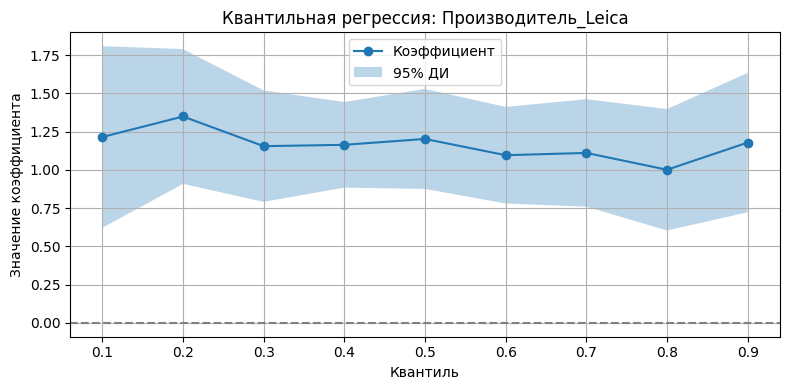

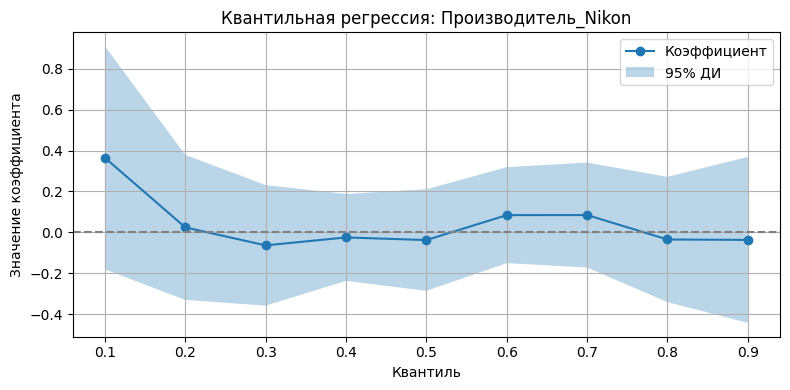

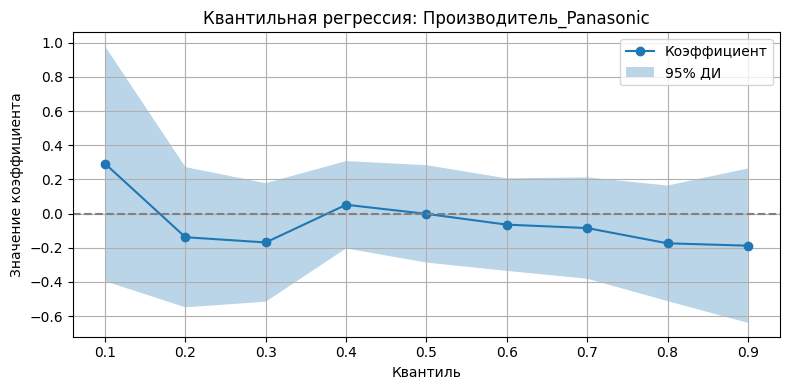

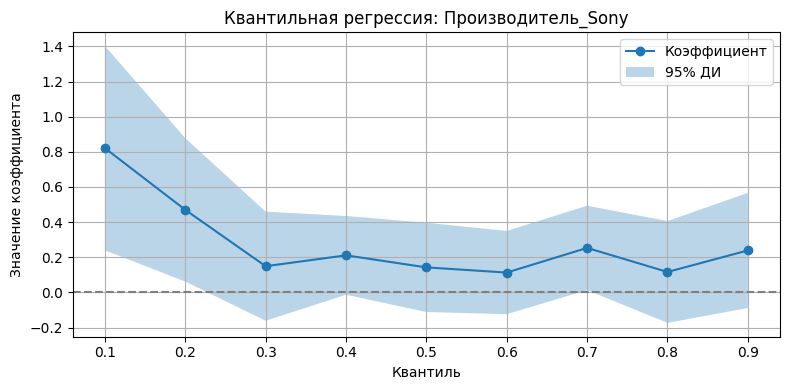

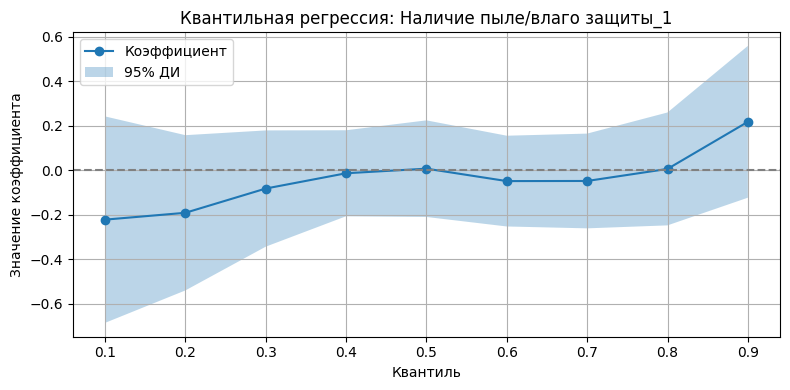

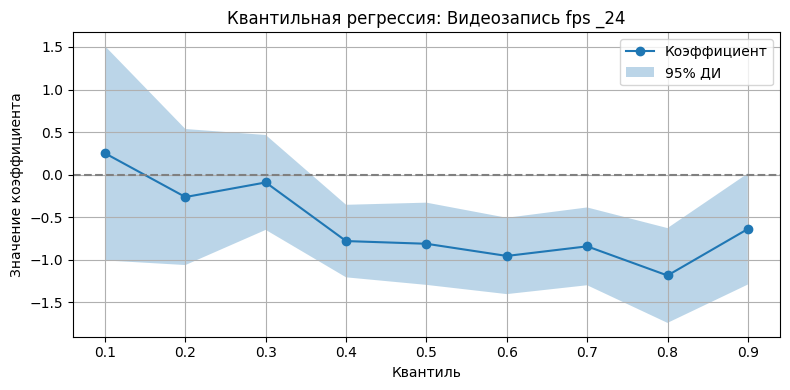

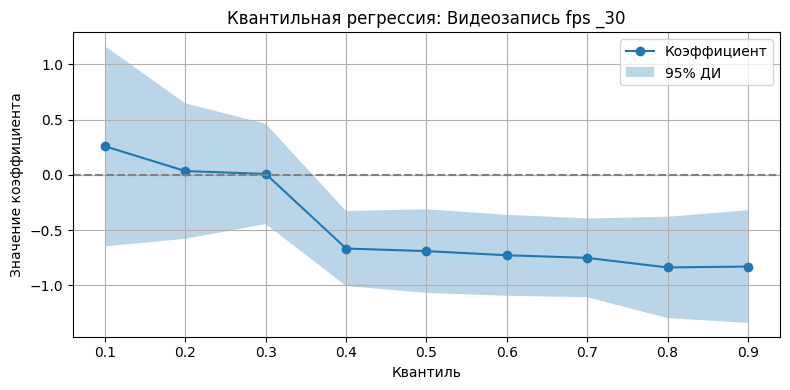

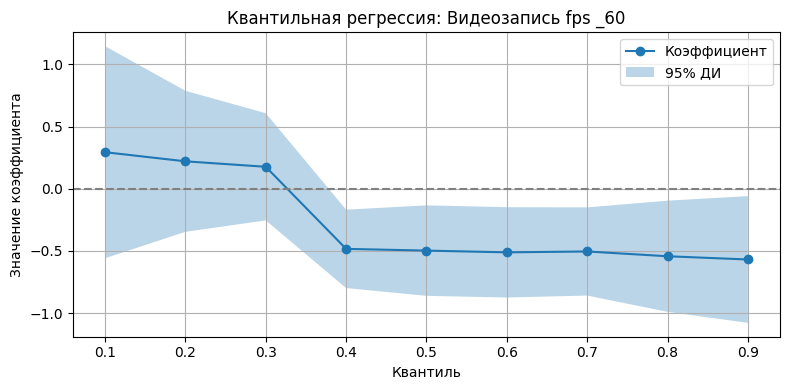

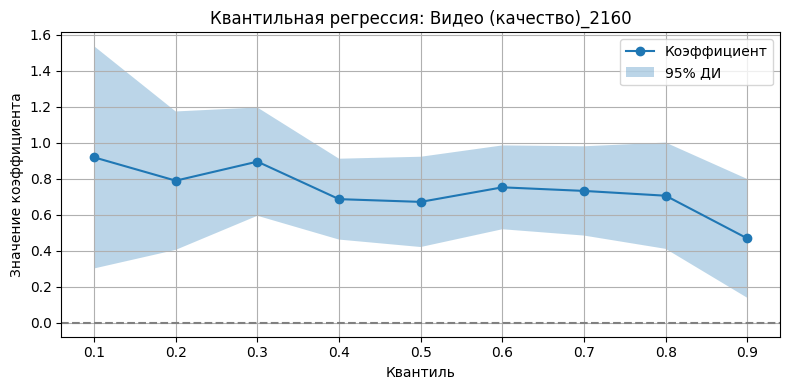

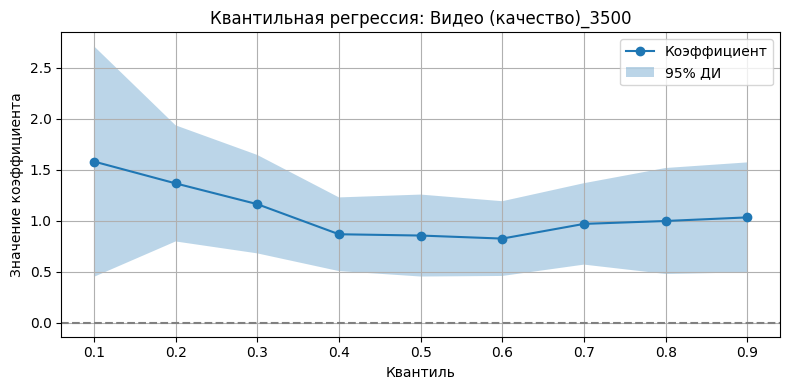

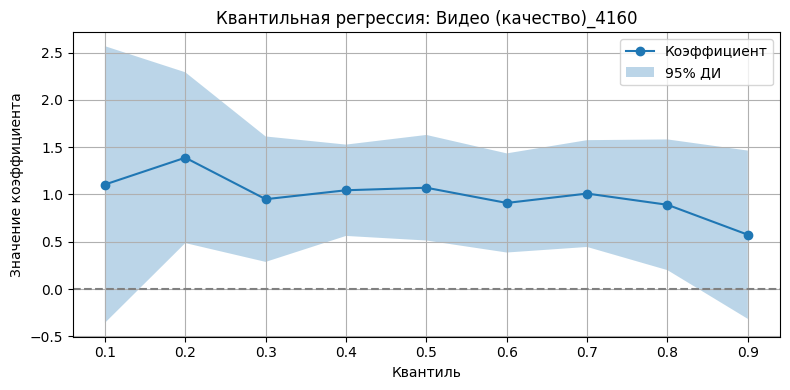

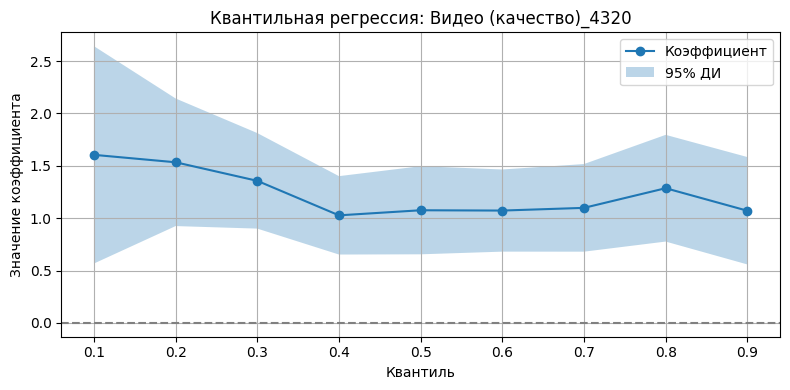

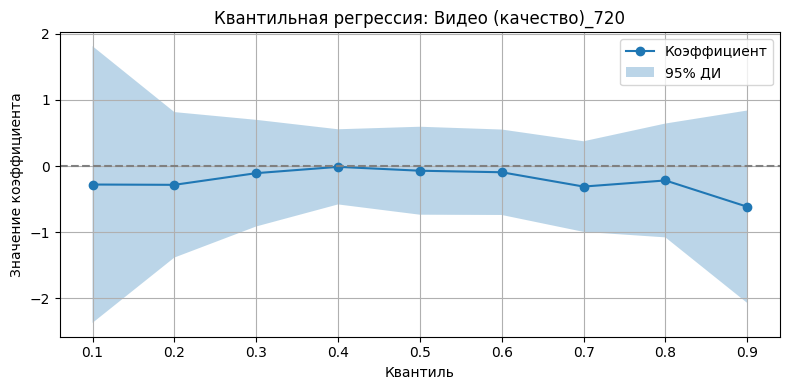

In [30]:
import matplotlib.pyplot as plt
variables = X2.columns
for var in variables:
    coefs = []
    lower_bounds = []
    upper_bounds = []

    for q in specific_quantiles:
        res = specific_quantile_results[q]
        coefs.append(res.params[var])
        conf_int = res.conf_int().loc[var]
        lower_bounds.append(conf_int[0])
        upper_bounds.append(conf_int[1])
    plt.figure(figsize=(8, 4))
    plt.plot(specific_quantiles, coefs, marker='o', label='Коэффициент')
    plt.fill_between(specific_quantiles, lower_bounds, upper_bounds, alpha=0.3, label='95% ДИ')
    plt.title(f'Квантильная регрессия: {var}')
    plt.xlabel('Квантиль')
    plt.ylabel('Значение коэффициента')
    plt.axhline(0, color='grey', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
